In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',200)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

from scipy.stats import skew,boxcox,yeojohnson
from sklearn.model_selection import GridSearchCV,StratifiedKFold,cross_val_score,train_test_split
from sklearn.preprocessing import PowerTransformer,StandardScaler,scale,PolynomialFeatures


import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

- Only 1460 rows are there,  hence we must avoid dropping rows
- It is preferable to drop columns with discrepancy than rows with discrepancy

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.isnull().sum()/len(df)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [8]:
#Analyze null values

null_dict=dict(zip((df.isnull().sum()/len(df)*100).keys(),(df.isnull().sum()/len(df)*100).values))

#Drop 95% nan values as it is meaningless due to less variable information
drop_list=list(dict(filter(lambda e:e[1]>=90,null_dict.items())).keys())
print(drop_list)
df.drop(columns=drop_list,axis=1,inplace=True)
#Find columns with columns more than 10% nan values
null_dict=dict(zip((df.isnull().sum()/len(df)*100).keys(),(df.isnull().sum()/len(df)*100).values))

drop_list=list(dict(filter(lambda e:e[1]>=10,null_dict.items())).keys())

['Alley', 'PoolQC', 'MiscFeature']


In [9]:
#Viewing data details in dataset
for i in drop_list:
    print(i+': ',end='')
    if(len(df[i].unique())<=30):
        #print(df[i].unique())
        print(round(df[i].value_counts()/len(df)*100),3)
    else:
        print('\tunique count = {}, range = [ {}-{} ]'.format(len(df[i].unique()),df[i].min(),df[i].max()))

LotFrontage: 	unique count = 111, range = [ 21.0-313.0 ]
FireplaceQu: Gd    26.0
TA    21.0
Fa     2.0
Ex     2.0
Po     1.0
Name: FireplaceQu, dtype: float64 3
Fence: MnPrv    11.0
GdPrv     4.0
GdWo      4.0
MnWw      1.0
Name: Fence, dtype: float64 3


- By logic LotFrontage cannot be null or 0 because frontage is the side touching the street. Hence we can drop

In [10]:
df.drop(columns=['LotFrontage'],axis=1,inplace=True)

### Analyzing nulls and imputation

In [11]:
#Viewing data details in dataset
for i in df.columns:
    print(str(i)+': ',end='')
    if(len(df[i].unique())<=30):
        #print(df[i].unique())
        print(round(df[i].value_counts()/len(df)*100),3)
    else:
        print('\tunique count = {}, range = [ {}-{} ]'.format(len(df[i].unique()),df[i].min(),df[i].max()))
    if(len(df[i].isnull())>0):
        print('null\t'+str(round(df[i].isnull().sum()/len(df)*100,2)))

Id: 	unique count = 1460, range = [ 1-1460 ]
null	0.0
MSSubClass: 20     37.0
60     20.0
50     10.0
120     6.0
30      5.0
160     4.0
70      4.0
80      4.0
90      4.0
190     2.0
85      1.0
75      1.0
45      1.0
180     1.0
40      0.0
Name: MSSubClass, dtype: float64 3
null	0.0
MSZoning: RL         79.0
RM         15.0
FV          4.0
RH          1.0
C (all)     1.0
Name: MSZoning, dtype: float64 3
null	0.0
LotArea: 	unique count = 1073, range = [ 1300-215245 ]
null	0.0
Street: Pave    100.0
Grvl      0.0
Name: Street, dtype: float64 3
null	0.0
LotShape: Reg    63.0
IR1    33.0
IR2     3.0
IR3     1.0
Name: LotShape, dtype: float64 3
null	0.0
LandContour: Lvl    90.0
Bnk     4.0
HLS     3.0
Low     2.0
Name: LandContour, dtype: float64 3
null	0.0
Utilities: AllPub    100.0
NoSeWa      0.0
Name: Utilities, dtype: float64 3
null	0.0
LotConfig: Inside     72.0
Corner     18.0
CulDSac     6.0
FR2         3.0
FR3         0.0
Name: LotConfig, dtype: float64 3
null	0.0
LandSlope: G

- Few columns have less variance in data. Hence we can drop columns with 5% or less variance
- Many categorical columns have population occupying less than 1% which can be clubbed to others
- We can check if any of the year columns are redundant based on the correlation amongst them
- Year can be converted to age w.r.t 2020

In [12]:
#Find columns with 95% or more same data
drop_list=[]
for i in df.columns:
    if(i!='Id'):
        #print(list(df[i].value_counts())[0])
        if((round(list(df[i].value_counts())[0]/len(df)*100),2)[0]>=95):
            drop_list.append(i)
print(drop_list)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal']


In [13]:
#Drop columns identified with 95%  or more same data
df.drop(columns=drop_list,axis=1,inplace=True)
df.shape

(1460, 66)

In [14]:
#Combine categories less than 1.2% to a single 'Others' category
convert_others={}
for i in df.columns[1:]:
    if(df[i].dtype=='object'):
        uniq=dict(df[i].value_counts()/len(df)*100)
        final = dict(filter(lambda e: e[1] <= 1.2, uniq.items()))
        if(len(final)>1):
            keys=list(final.keys())
    
            values=[ 'Others' for i in range(0,len(final))]
            col_rep=dict(zip(keys,values))
            print('{}: {} = {}%\n'.format(i,keys,round(sum(final.values()),2)))
            df=df.replace({i:col_rep})
            convert_others[i]=col_rep
print(convert_others)

MSZoning: ['RH', 'C (all)'] = 1.78%

Neighborhood: ['MeadowV', 'Blmngtn', 'BrDale', 'Veenker', 'NPkVill', 'Blueste'] = 4.93%

Condition1: ['RRAe', 'PosA', 'RRNn', 'RRNe'] = 1.78%

HouseStyle: ['1.5Unf', '2.5Unf', '2.5Fin'] = 2.26%

RoofStyle: ['Flat', 'Gambrel', 'Mansard', 'Shed'] = 2.26%

Exterior1st: ['BrkComm', 'Stone', 'AsphShn', 'CBlock', 'ImStucc'] = 0.48%

Exterior2nd: ['ImStucc', 'Brk Cmn', 'Stone', 'AsphShn', 'Other', 'CBlock'] = 1.85%

ExterCond: ['Ex', 'Po'] = 0.27%

Foundation: ['Stone', 'Wood'] = 0.62%

Electrical: ['FuseP', 'Mix'] = 0.27%

Functional: ['Mod', 'Maj1', 'Maj2', 'Sev'] = 2.4%

GarageType: ['CarPort', '2Types'] = 1.03%

GarageQual: ['Gd', 'Ex', 'Po'] = 1.37%

GarageCond: ['Gd', 'Po', 'Ex'] = 1.23%

SaleType: ['ConLD', 'ConLI', 'ConLw', 'CWD', 'Oth', 'Con'] = 1.92%

SaleCondition: ['Alloca', 'AdjLand'] = 1.1%

{'MSZoning': {'RH': 'Others', 'C (all)': 'Others'}, 'Neighborhood': {'MeadowV': 'Others', 'Blmngtn': 'Others', 'BrDale': 'Others', 'Veenker': 'Others', '

In [15]:
#Verifying data with 'Others' 
for i in df.columns[1:]:
    if( df[i].dtype=='object'):
        print('{}: {}'.format(i,df[i].unique()))

MSZoning: ['RL' 'RM' 'Others' 'FV']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Neighborhood: ['CollgCr' 'Others' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'SWISU']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'Others' 'RRAn']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' 'Others' 'SFoyer' 'SLvl']
RoofStyle: ['Gable' 'Hip' 'Others']
Exterior1st: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'Others']
Exterior2nd: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Others']
MasVnrType: ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
ExterQual: ['Gd' 'TA' 'Ex' 'Fa']
ExterCond: ['TA' 'Gd' 'Fa' 'Others']
Foundation: ['PConc' 'CBlock' 'BrkTil' '

### Correlation between years

In [16]:
#Check % of rows different in YearRemodAdd,GarageYrBlt, YrSold w.r.t YearBuilt
df1=df[['Id','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']]
df1['Diff_Year1']=df1['YearRemodAdd']-df1['YearBuilt']
print('Variance of YearRemodAdd w.r.t YearBuilt:\t{}%'.format(round(100-len(df1.query('Diff_Year1=="0"'))/(len(df1)-df1['YearRemodAdd'].isnull().sum())*100,2)))
df1['Diff_Year2']=df1['GarageYrBlt']-df1['YearBuilt']
print('Variance of GarageYrBlt w.r.t YearBuilt: \t{}%'.format(round(100-len(df1.query('Diff_Year2=="0"'))/(len(df1)-df1['GarageYrBlt'].isnull().sum())*100,2)))
df1['Diff_Year3']=df1['YrSold']-df1['YearBuilt']
print('Variance of YrSold w.r.t YearBuilt: \t\t{}%'.format(round(100-len(df1.query('Diff_Year3=="0"'))/(len(df1)-df1['YrSold'].isnull().sum())*100,2)))

Variance of YearRemodAdd w.r.t YearBuilt:	47.67%
Variance of GarageYrBlt w.r.t YearBuilt: 	21.03%
Variance of YrSold w.r.t YearBuilt: 		95.62%


Text(0.5, 1.0, 'Correlation between Year columns')

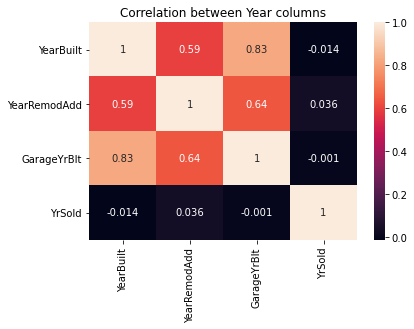

In [17]:
#Heatmap of correlation between Year columns
sns.heatmap(df1[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']].corr(),annot=True)
plt.title('Correlation between Year columns')

- This indicates that 48% of the buildings have a different remodel year from the built year
- This indicates that 21% of GarageYrBlt varies from YearBuilt
- Correlation between GarageYrBlt and YearBuilt is high(0.83). Hence this column can be dropped
- This indicates that 96% of YrSold differs with respect to YearBuilt

In [18]:
#Dropping GarageYrBlt
df.drop(columns='GarageYrBlt',axis=1,inplace=True)

### Converting Year to Age

In [19]:
#Keep copy before changing
df_orig=df.copy()

#Check max and min values
print('Max Value\n*********')
print(df[['YearBuilt','YrSold','YearRemodAdd']].max())
print('\nMin value\n*********')
print(df[['YearBuilt','YrSold','YearRemodAdd']].min())
print(df.shape)

Max Value
*********
YearBuilt       2010
YrSold          2010
YearRemodAdd    2010
dtype: int64

Min value
*********
YearBuilt       1872
YrSold          2006
YearRemodAdd    1950
dtype: int64
(1460, 65)


In [20]:

#Find Age from 2020 and store as Age columns
df['YearBuiltAge']=2020-df['YearBuilt']
df['YearRemodAddAge']=2020-df['YearRemodAdd']
df['YrSoldAge']=2020-df['YrSold']

In [21]:
#Drop original Year columns and retain Age columns
df.drop(['YearBuilt','YearRemodAdd','YrSold'],axis=1,inplace=True)

In [22]:

#check shape
df.shape

(1460, 65)

In [23]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,YearBuiltAge,YearRemodAddAge,YrSoldAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,6.321918,180921.195890,48.732192,35.134247,12.184247
std,421.610009,42.300571,9981.264932,1.382997,1.112799,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,2.703626,79442.502883,30.202904,20.645407,1.328095
min,1.000000,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,10.000000,10.000000,10.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,20.000000,16.000000,11.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,6.000000,163000.000000,47.000000,26.000000,12.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,8.000000,214000.000000,66.000000,53.000000,13.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,12.000000,755000.000000,148.000000,70.000000,14.000000


### Imputation

In [24]:
# Get list of columns with nan values
null_col=list(df.columns[df.isnull().any()])
print('Column_Name(DType) :\tNull% \t Null_Count ')
print('********************\t******\t************')
for i in null_col:
    print('{}({}) :\t{} \t {}'.format(i,df[i].dtype,round(df[i].isnull().sum()/len(df),2),df[i].isnull().sum()))

Column_Name(DType) :	Null% 	 Null_Count 
********************	******	************
MasVnrType(object) :	0.01 	 8
MasVnrArea(float64) :	0.01 	 8
BsmtQual(object) :	0.03 	 37
BsmtCond(object) :	0.03 	 37
BsmtExposure(object) :	0.03 	 38
BsmtFinType1(object) :	0.03 	 37
BsmtFinType2(object) :	0.03 	 38
Electrical(object) :	0.0 	 1
FireplaceQu(object) :	0.47 	 690
GarageType(object) :	0.06 	 81
GarageFinish(object) :	0.06 	 81
GarageQual(object) :	0.06 	 81
GarageCond(object) :	0.06 	 81
Fence(object) :	0.81 	 1179


In [25]:
df[df['FireplaceQu'].isnull()]['Fireplaces'].unique()

array([0])

-  Implies that fire quality is null only for Fireplace number is 0

In [26]:
# df['Fence']]

In [27]:
df[df['FireplaceQu'].notnull()]['Fireplaces'].unique()

array([1, 2, 3])

- Implies no junk value like 0 in FireplaceQu not null
- FireplaceQu null values can be replaced with "No Fireplace" 

In [28]:
df['FireplaceQu']=df['FireplaceQu'].fillna(value='NoFireplace')

In [29]:
#As per data dictionary replacing with 
df['Fence']=df['Fence'].fillna(value='NoFence')

### Checking if GarageType is null because of no garage
- If all the other Garage columns are null we can assume that Garage is not present for the buiding/house
- Accordingly do imputation

In [30]:

#Checking null values for other Garage columns where GarageType is null
df1=df['GarageType'].isnull() & df['GarageFinish'].isnull() & df['GarageQual'].isnull() & df['GarageCond'].isnull()
print('GarageType_Nullcnt: {}'.format(df['GarageType'].isnull().sum()))
print('Column_Name:\tNullCntInColumn\t\tNullCnt_with_GarageTypeasNull')
print('************\t***************\t\t*****************************')
Gar_list=['GarageType','GarageFinish','GarageQual','GarageCond']
for i in Gar_list:
    print('{}:\t{}\t\t\t{}'.format(i,df[i].isnull().sum(),df[i][df1].isnull().sum()))
i='GarageCars'
print('\n{}: null_cnt={}, col_sum={},col_min={},col_max={}'.format(i,df[i].isnull().sum(),df[i][df1].sum(),df[i][df1].min(),df[i][df1].max()))

GarageType_Nullcnt: 81
Column_Name:	NullCntInColumn		NullCnt_with_GarageTypeasNull
************	***************		*****************************
GarageType:	81			81
GarageFinish:	81			81
GarageQual:	81			81
GarageCond:	81			81

GarageCars: null_cnt=0, col_sum=0,col_min=0,col_max=0


- This indicates that for all GarageType is null, the other Garage columns are null
- Also GarageCars is 0 for all GarageType null
- That is Garage Type is no Garage and so other columns are invalid, not unkown
- This means we can replace null values with NoGarage in categorical Garage Columns and 0 in numerical ones

In [31]:
#Replace null values with NoGarage in categorical Garage Columns and 0 in Garage Cars
for i in Gar_list:
    if(df[i].dtype!='float64'):
        df[i]=df[i].fillna(value='NoGarage',axis=0)        
    else:
        df[i][df1]=0

In [32]:
#Since Garage columns are imputed,removing the same from null_col list which is yet to be imputed
for i in Gar_list:
    null_col.remove(i)

In [33]:
#Verifying if all rows of Garage Columns are imputed
for i in Gar_list:
    print('{} : {}'.format(i,df[i].isnull().sum()))
    print(df[i].unique())

GarageType : 0
['Attchd' 'Detchd' 'BuiltIn' 'Others' 'NoGarage' 'Basment']
GarageFinish : 0
['RFn' 'Unf' 'Fin' 'NoGarage']
GarageQual : 0
['TA' 'Fa' 'Others' 'NoGarage']
GarageCond : 0
['TA' 'Fa' 'NoGarage' 'Others']


In [34]:
len(df[df['TotalBsmtSF']==0])

37

In [35]:
BsmtCol=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','TotalBsmtSF','BsmtFinSF2', 'BsmtUnfSF']
#Checking null values for other Garage columns where GarageType is null
df1=df[BsmtCol[0]].isnull() & df[BsmtCol[1]].isnull() & df[BsmtCol[2]].isnull() & df[BsmtCol[3]].isnull() & df[BsmtCol[5]].isnull() 
print('Column_Name:\tNullCntInColumn\t\tNullCnt_with_BsmtQualasNull')
print('************\t***************\t\t*****************************')
#Gar_list=['GarageType','GarageFinish','GarageQual','GarageCond']
for i in BsmtCol:
    print('{}:\t{}\t\t\t{}'.format(i,df[i].isnull().sum(),df[i][df1].isnull().sum()))
#Verifying if numerical columns are zero
for i in ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']:
    print('\n{}: null_cnt={}, col_sum={},col_min={},col_max={}'.format(i,df[i].isnull().sum(),df[i][df1].sum(),df[i][df1].min(),df[i][df1].max()))

Column_Name:	NullCntInColumn		NullCnt_with_BsmtQualasNull
************	***************		*****************************
BsmtQual:	37			37
BsmtCond:	37			37
BsmtExposure:	38			37
BsmtFinType1:	37			37
BsmtFinSF1:	0			0
BsmtFinType2:	38			37
TotalBsmtSF:	0			0
BsmtFinSF2:	0			0
BsmtUnfSF:	0			0

BsmtFinSF1: null_cnt=0, col_sum=0,col_min=0,col_max=0

BsmtFinSF2: null_cnt=0, col_sum=0,col_min=0,col_max=0

BsmtUnfSF: null_cnt=0, col_sum=0,col_min=0,col_max=0

TotalBsmtSF: null_cnt=0, col_sum=0,col_min=0,col_max=0


In [36]:
#remove already zero count
BsmtCol.remove('BsmtFinSF1')
BsmtCol.remove('BsmtFinSF2')
BsmtCol.remove('BsmtUnfSF')
BsmtCol.remove('TotalBsmtSF')

In [37]:
#Replace null values with NoBasement in categorical Basement columns
index=list(df[df1].index)
for col in BsmtCol:
    for ind in index:
        df.loc[ind,col]='NoBasement'

In [38]:
for i in BsmtCol:
    print('{}:\t{}\t\t\t{}'.format(i,df[i].isnull().sum(),df[i][df1].isnull().sum()))

BsmtQual:	0			0
BsmtCond:	0			0
BsmtExposure:	1			0
BsmtFinType1:	0			0
BsmtFinType2:	1			0


In [39]:
null_col.remove('BsmtQual')
null_col.remove('BsmtCond')
null_col.remove('BsmtFinType1')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1460 non-null   int64  
 1   MSSubClass       1460 non-null   int64  
 2   MSZoning         1460 non-null   object 
 3   LotArea          1460 non-null   int64  
 4   LotShape         1460 non-null   object 
 5   LandContour      1460 non-null   object 
 6   LotConfig        1460 non-null   object 
 7   Neighborhood     1460 non-null   object 
 8   Condition1       1460 non-null   object 
 9   BldgType         1460 non-null   object 
 10  HouseStyle       1460 non-null   object 
 11  OverallQual      1460 non-null   int64  
 12  OverallCond      1460 non-null   int64  
 13  RoofStyle        1460 non-null   object 
 14  Exterior1st      1460 non-null   object 
 15  Exterior2nd      1460 non-null   object 
 16  MasVnrType       1452 non-null   object 
 17  MasVnrArea    

### Categorical Columns with null values

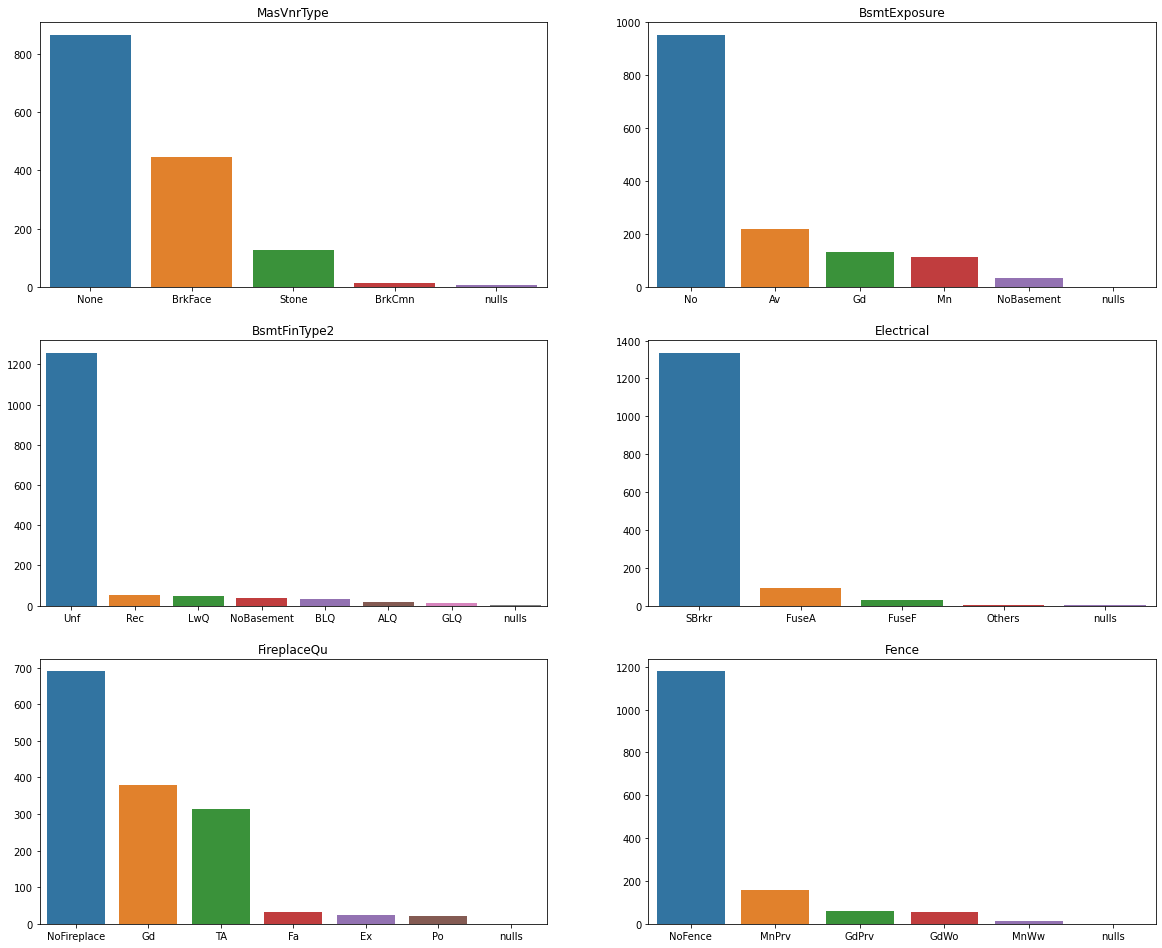

In [41]:
# Plot of Categorical columns with null values
plt.figure(figsize=(20,40))
j=1
for i in null_col:
    
    plt.subplot(len(null_col)-2//2+1,2,j)
    plt.title(i)
    count_dict=df[i].value_counts()
    if(i not in ['MasVnrArea'] ) :
        j=j+1
        x=count_dict.keys()
        x=['{}'.format(k) for k in x]
        x.append('nulls')
        y=list(count_dict.values)
        y.append(df[i].isnull().sum())
        sns.barplot(x=x,y=y)

In [42]:
#Impute with highest occuring
cat_mode={}
for i in null_col:
    if(i not in ['MasVnrArea']):
        print(i,list(df[i].mode())[0])
        cat_mode[i]=list(df[i].mode())[0]
        
#         print('{}: {}'.format(i,list(df[i].value_counts().keys())[0]))
        df[i].fillna(value=list(df[i].mode())[0],inplace=True)

MasVnrType None
BsmtExposure No
BsmtFinType2 Unf
Electrical SBrkr
FireplaceQu NoFireplace
Fence NoFence


In [43]:
# df['LotFrontage'].dtype

In [44]:
#Verifying if all columns are imputed
for i in null_col:
    print('{} : {}'.format(i,df[i].isnull().sum()))

MasVnrType : 0
MasVnrArea : 8
BsmtExposure : 0
BsmtFinType2 : 0
Electrical : 0
FireplaceQu : 0
Fence : 0


In [45]:
### Imputation for numerical columns

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 6 Text major ticklabel objects>)

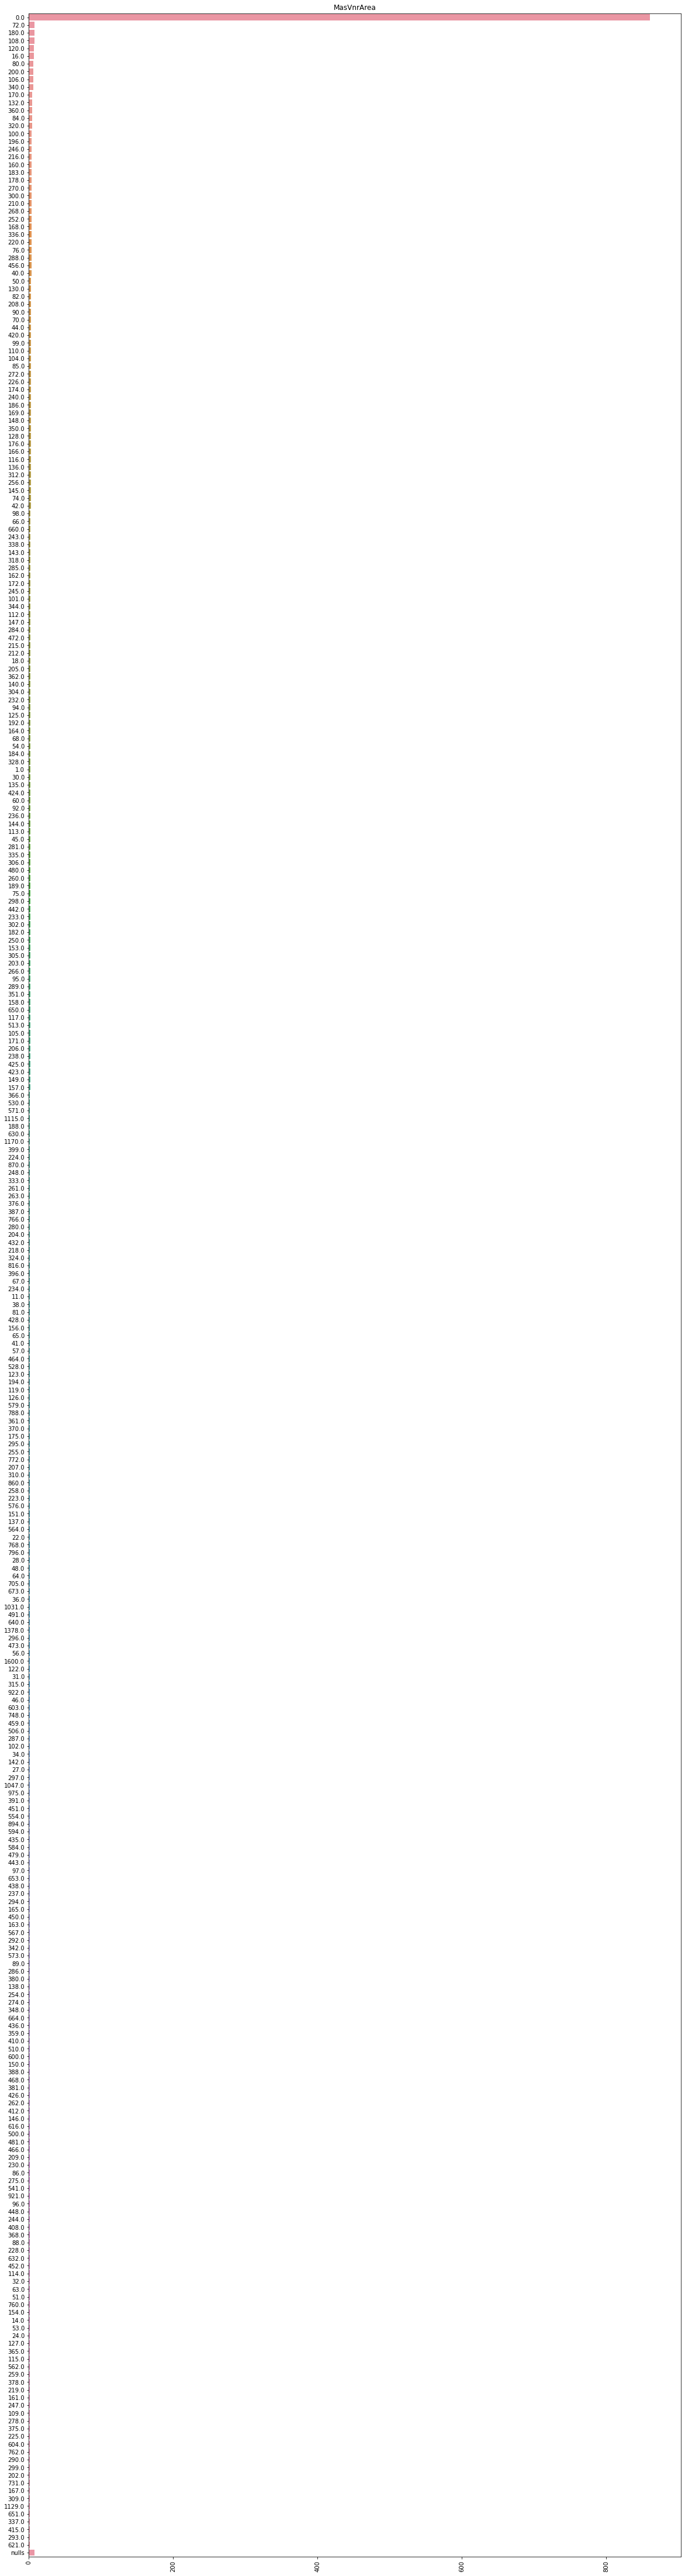

In [46]:
#plot of MasVnrArea
i='MasVnrArea'
plt.figure(figsize=(20,80))
plt.title(i)
count_dict=df[i].value_counts()
x=count_dict.keys()
x=['{}'.format(k) for k in x]
x.append('nulls')
y=list(count_dict.values)
y.append(df[i].isnull().sum())
sns.barplot(x=y,y=x)
plt.xticks(rotation=90)

In [47]:
#Impute with mode
i='MasVnrArea'
v=df[i].median()
print('Null count before imputation:\t{}'.format(df[i].isnull().sum()))
df[i]=df[i].fillna(value=v)
print('Null count after imputation:\t{}'.format(df[i].isnull().sum()))

Null count before imputation:	8
Null count after imputation:	0


In [48]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotArea            0
LotShape           0
LandContour        0
LotConfig          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu        0
GarageType         0
GarageFinish 

### Correlation between various columns

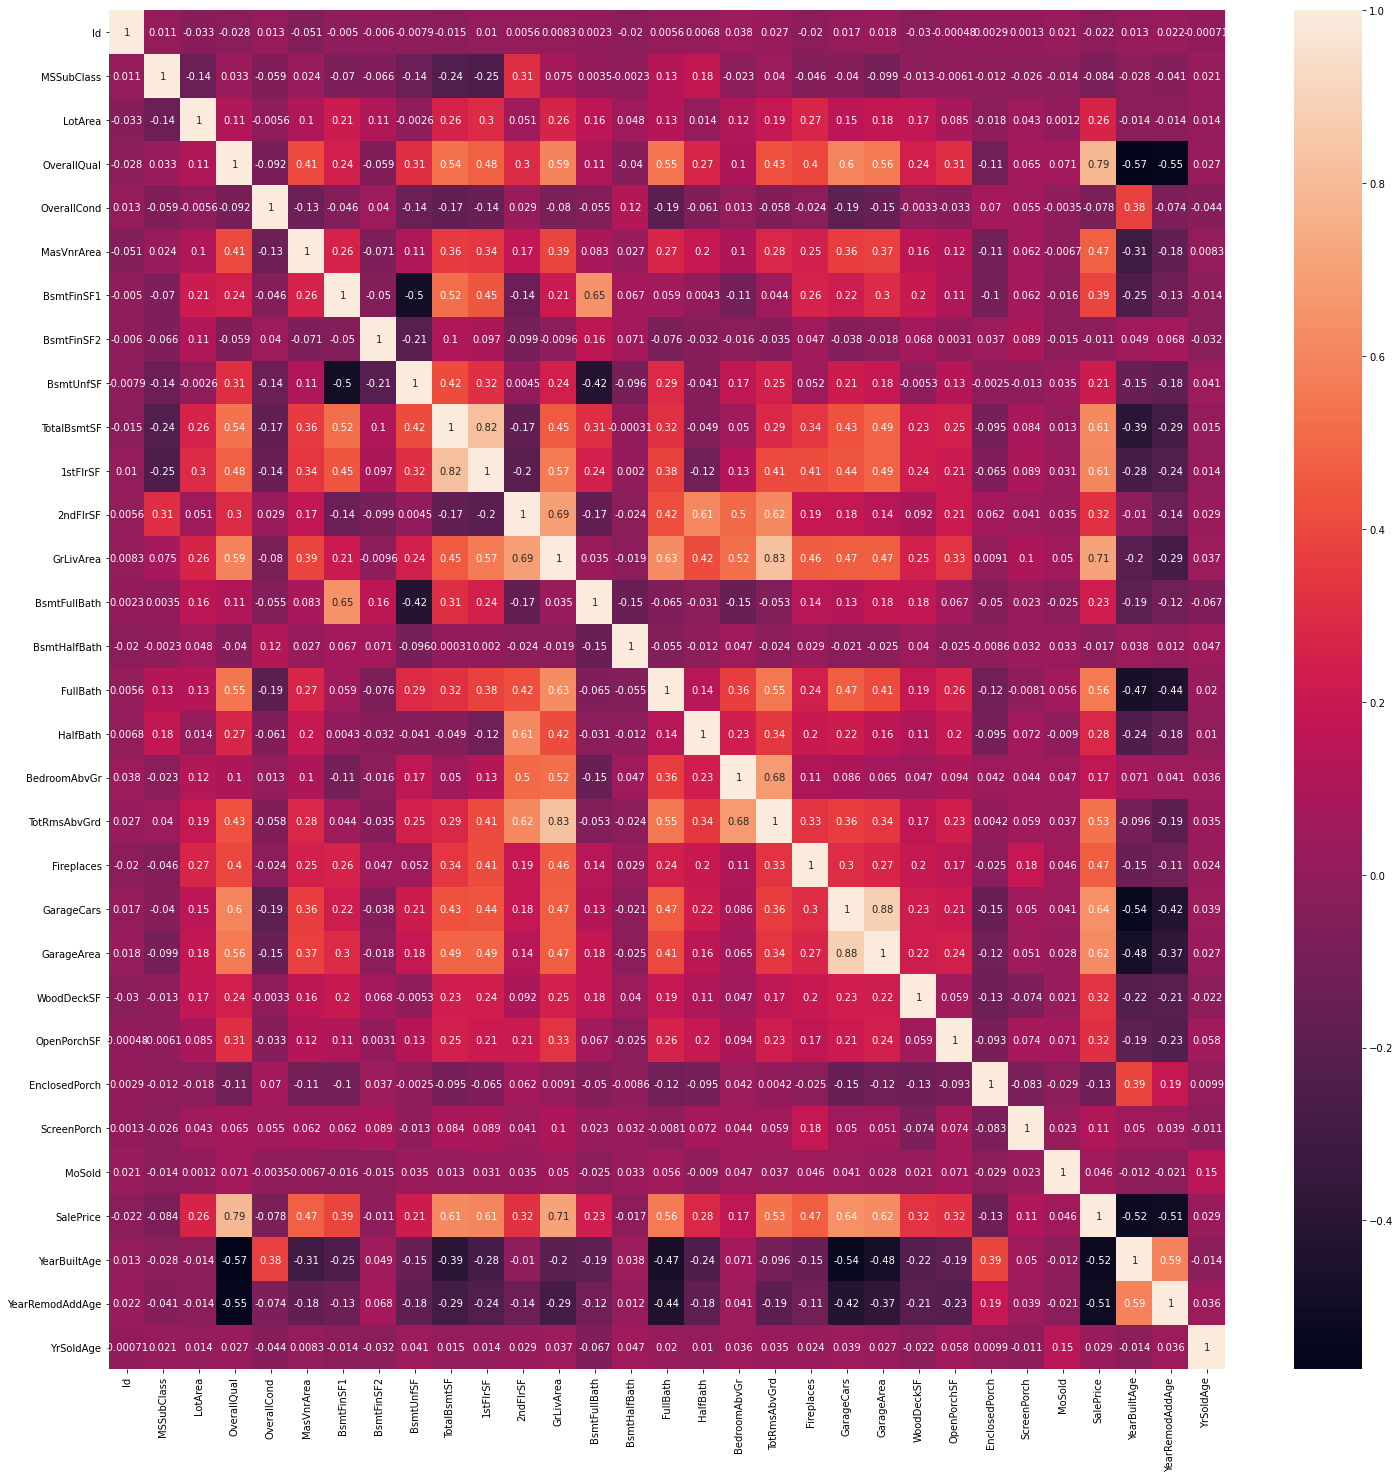

In [49]:
#Heatmap of dataset
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)

- Not removing any variabl based on correlation with SalesPrice 
- Below Variables with corr 0.70 and above with SalePrice- target variable, hence retaining
    - OverallQual
    - GrLiveArea
- There exists high correlation between
    - TotalBsmtSF and 1stFlrSF
    - GrLivArea and 2ndFlrSF
    - GrLivArea and TotRmsAbvGrd
    - BedroomAbvGr and TotRmsAbvGrd
    - GarageArea and GarageCars

In [50]:
# Dropping variables highly correlated 
df.drop(columns=['2ndFlrSF','TotRmsAbvGrd','1stFlrSF','GarageArea'],axis=1,inplace=True)

In [51]:
df.shape

(1460, 61)

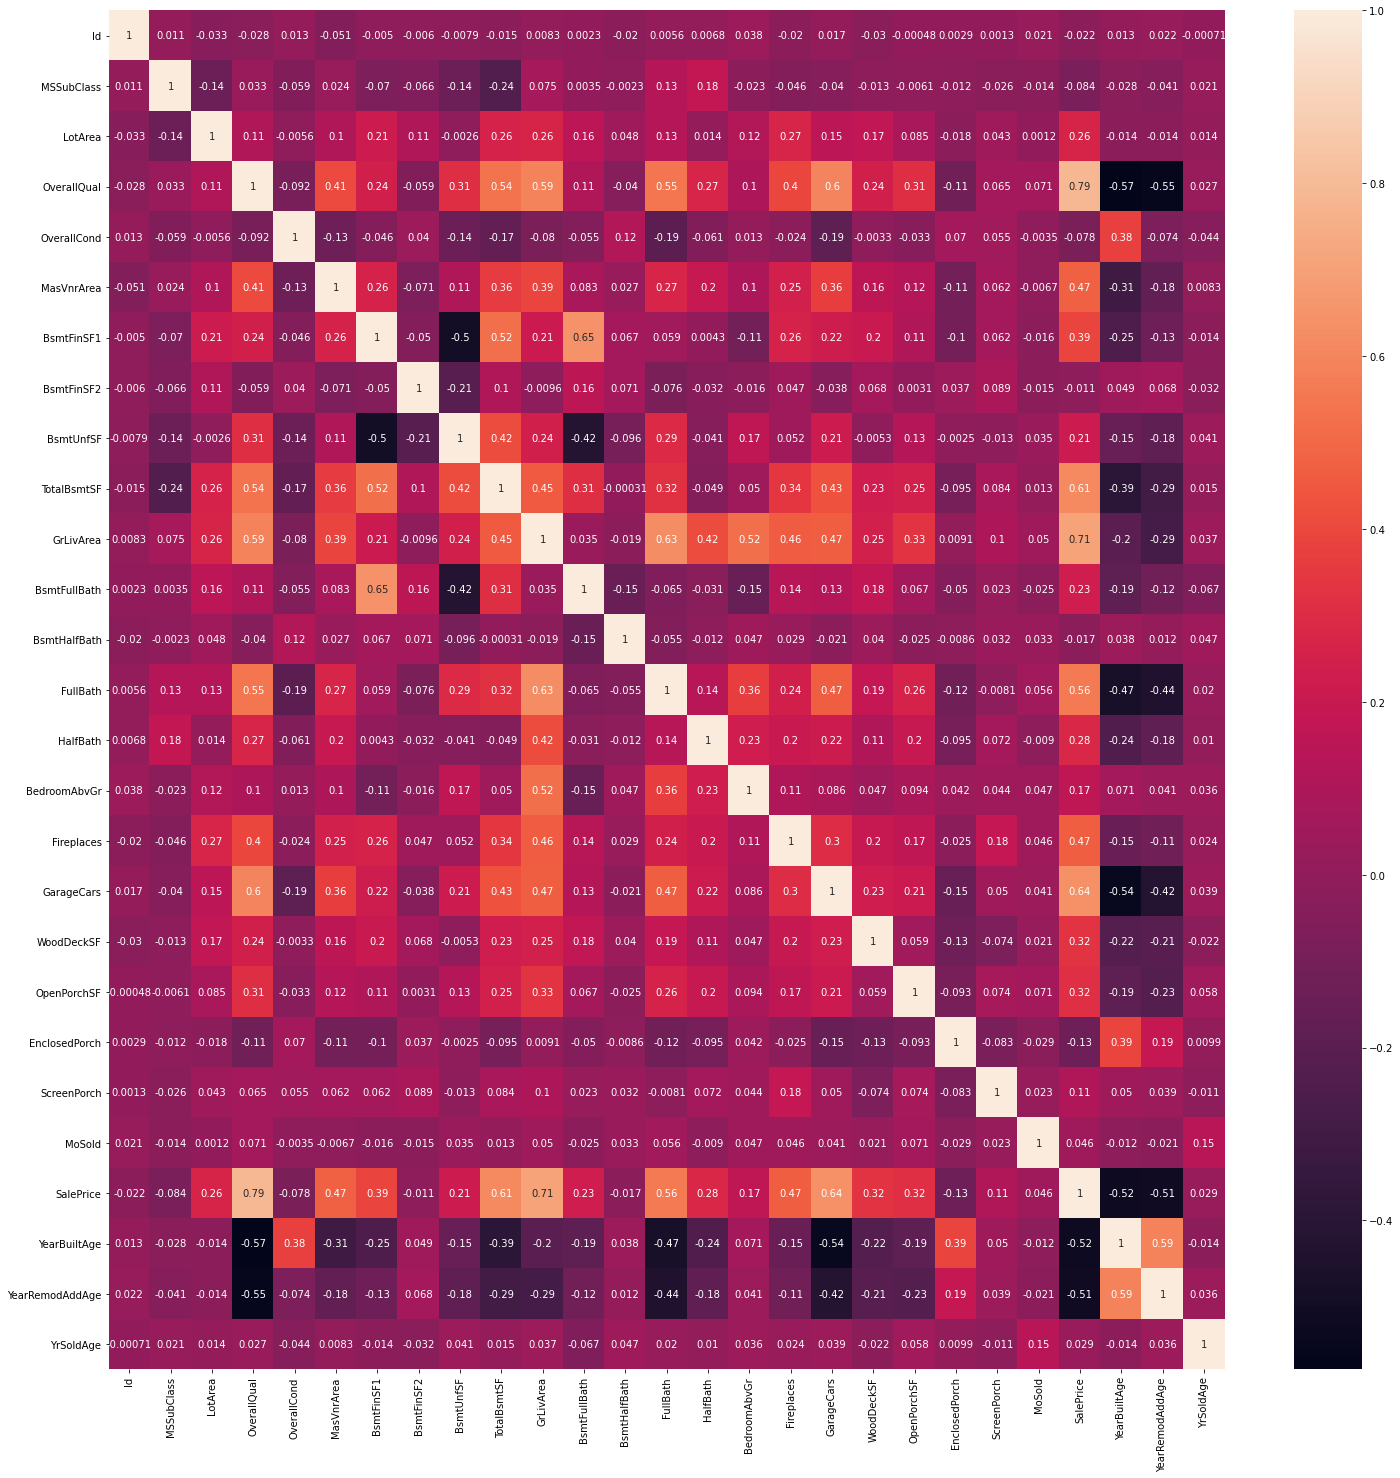

In [52]:
#Heatmap to check correlation again
plt.figure(figsize=(25,25))

sns.heatmap(df.corr(),annot=True)

In [53]:

# #Drop highly correlated columns
# df.drop(columns=['1stFlrSF','BedroomAbvGr','GarageCars'],inplace=True,axis=1)

In [54]:
df.shape

(1460, 61)

### Outlier Analysis

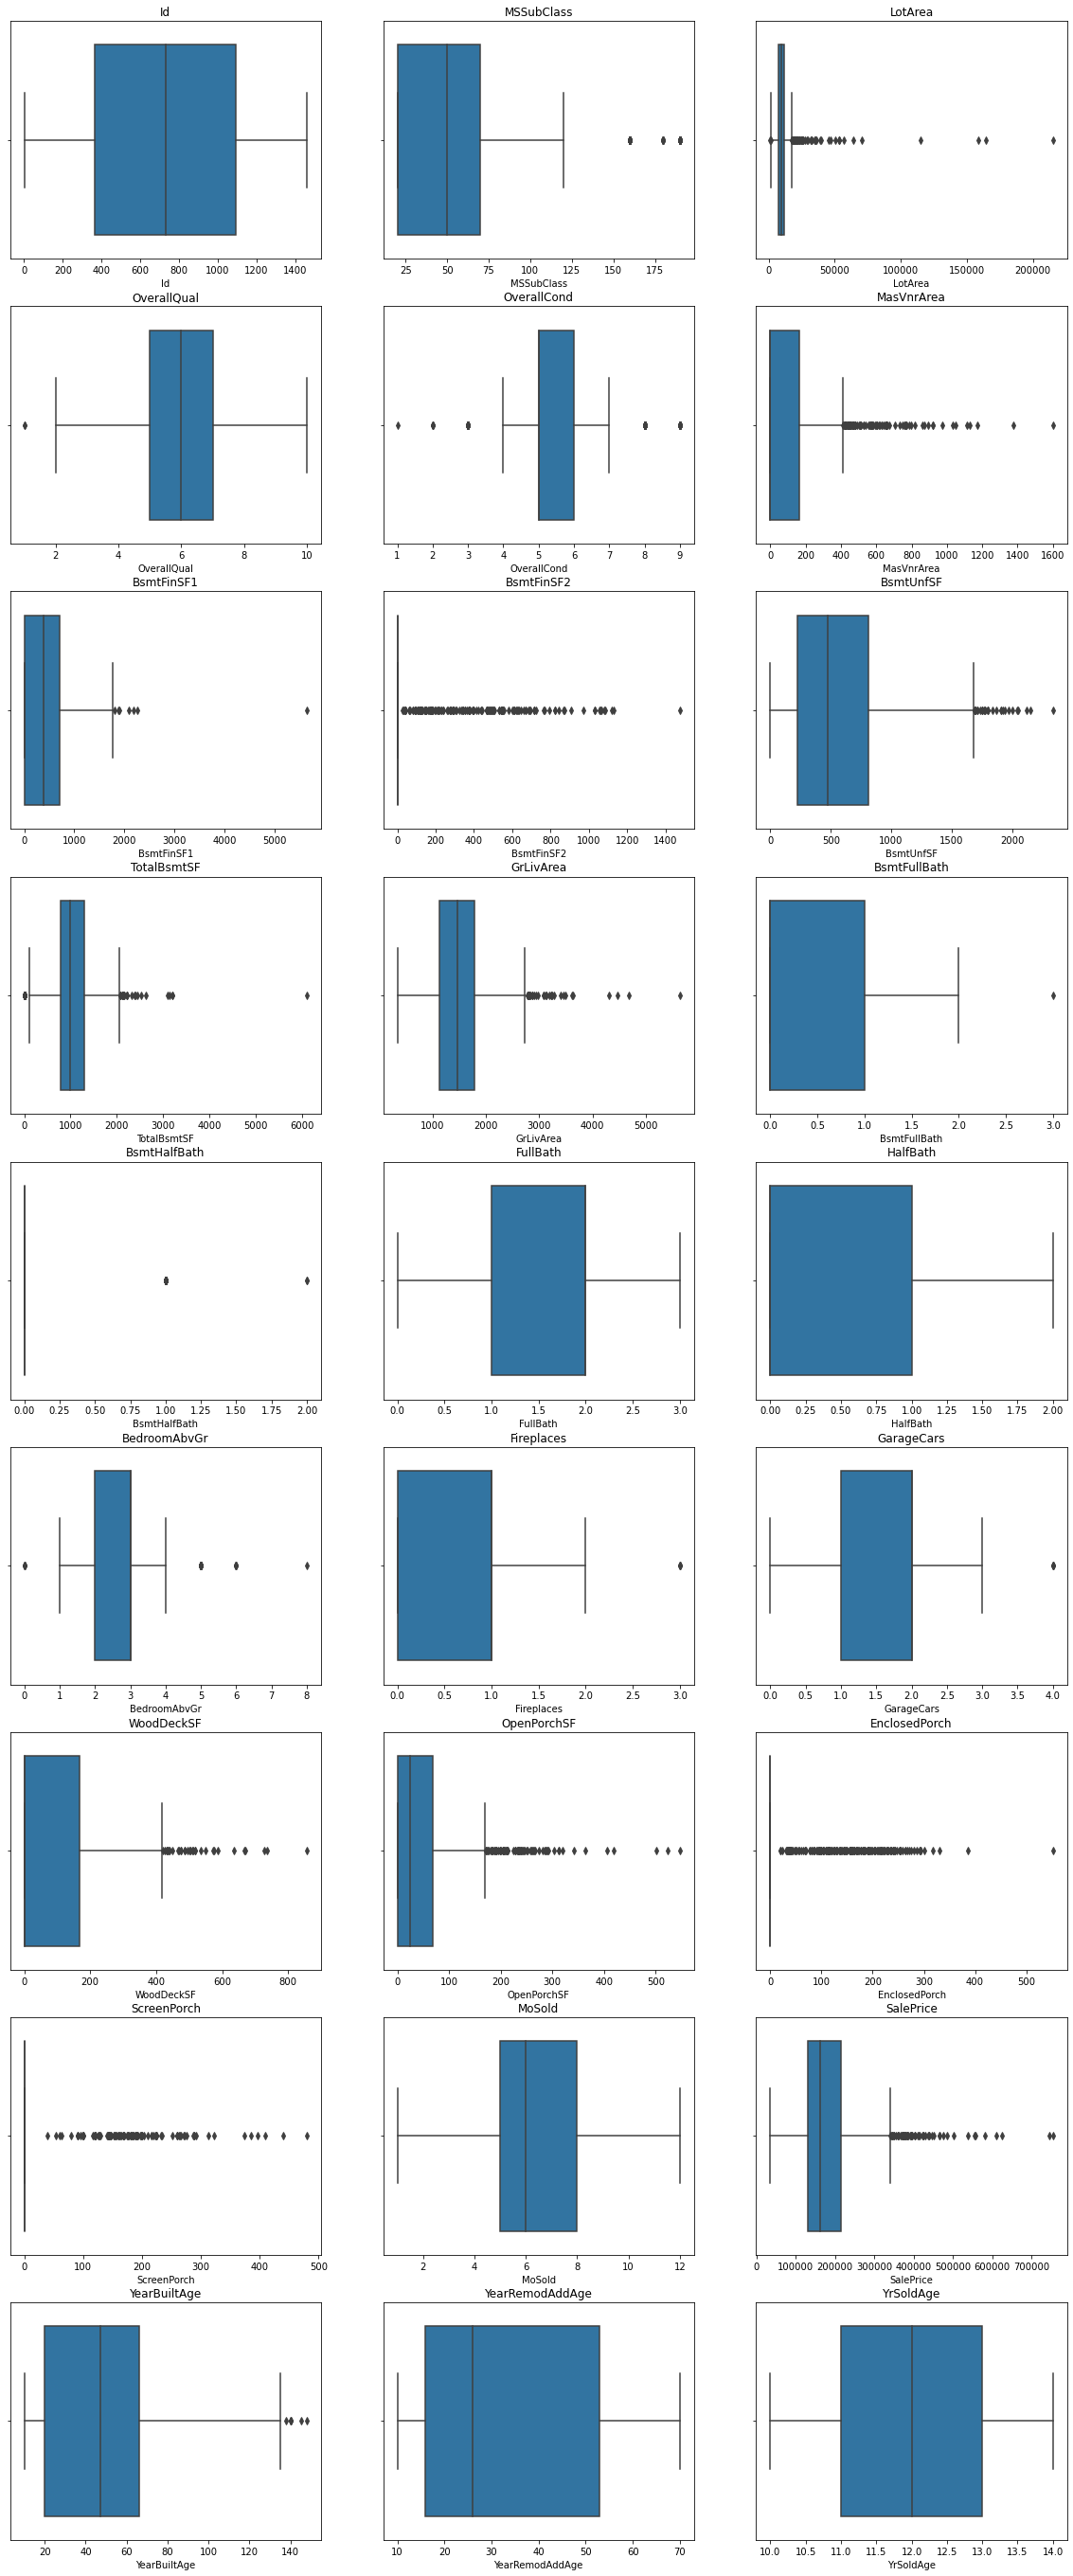

In [55]:

#Look at outliers
plt.figure(figsize=(20,60))
j=1
for i in df.columns:
    
    if(df[i].dtype=='int64' or df[i].dtype=='float64'):
        
        plt.subplot(30//3+1,3,j)
    #if(df[i].dtype=='float64' or df[i].dtype=='int64'):
        sns.boxplot(x=df[i])
        plt.title(i)
        j=j+1

Clearly following has outliers, hence capping them

- LotArea >100000
- MasVnrArea >1200
- BsmtFinSF1 >2500
- BsmtFinSF2 >1200
- TotalBsmtSF >4000
- WoodDeckSF >600
- OpenPorchSF >400
- EnclosedPorch >350
- ScreenPorch >350
- SalePrice >600000

In [56]:
#Capping columns
Cap_col=['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','WoodDeckSF','OpenPorchSF',
         'EnclosedPorch','ScreenPorch','SalePrice']
Cap_val=[100000,1200,2500,1200,4000,600,400,350,350,600000]

for i in enumerate(Cap_col):
    print(i[1],df[df[i[1]]<Cap_val[i[0]]][i[1]].max())
    df[i[1]]=df[i[1]].apply(lambda x: df[df[i[1]]<Cap_val[i[0]]][i[1]].max() if x>Cap_val[i[0]] else x )

LotArea 70761
MasVnrArea 1170.0
BsmtFinSF1 2260
BsmtFinSF2 1127
TotalBsmtSF 3206
WoodDeckSF 586
OpenPorchSF 364
EnclosedPorch 330
ScreenPorch 322
SalePrice 582933


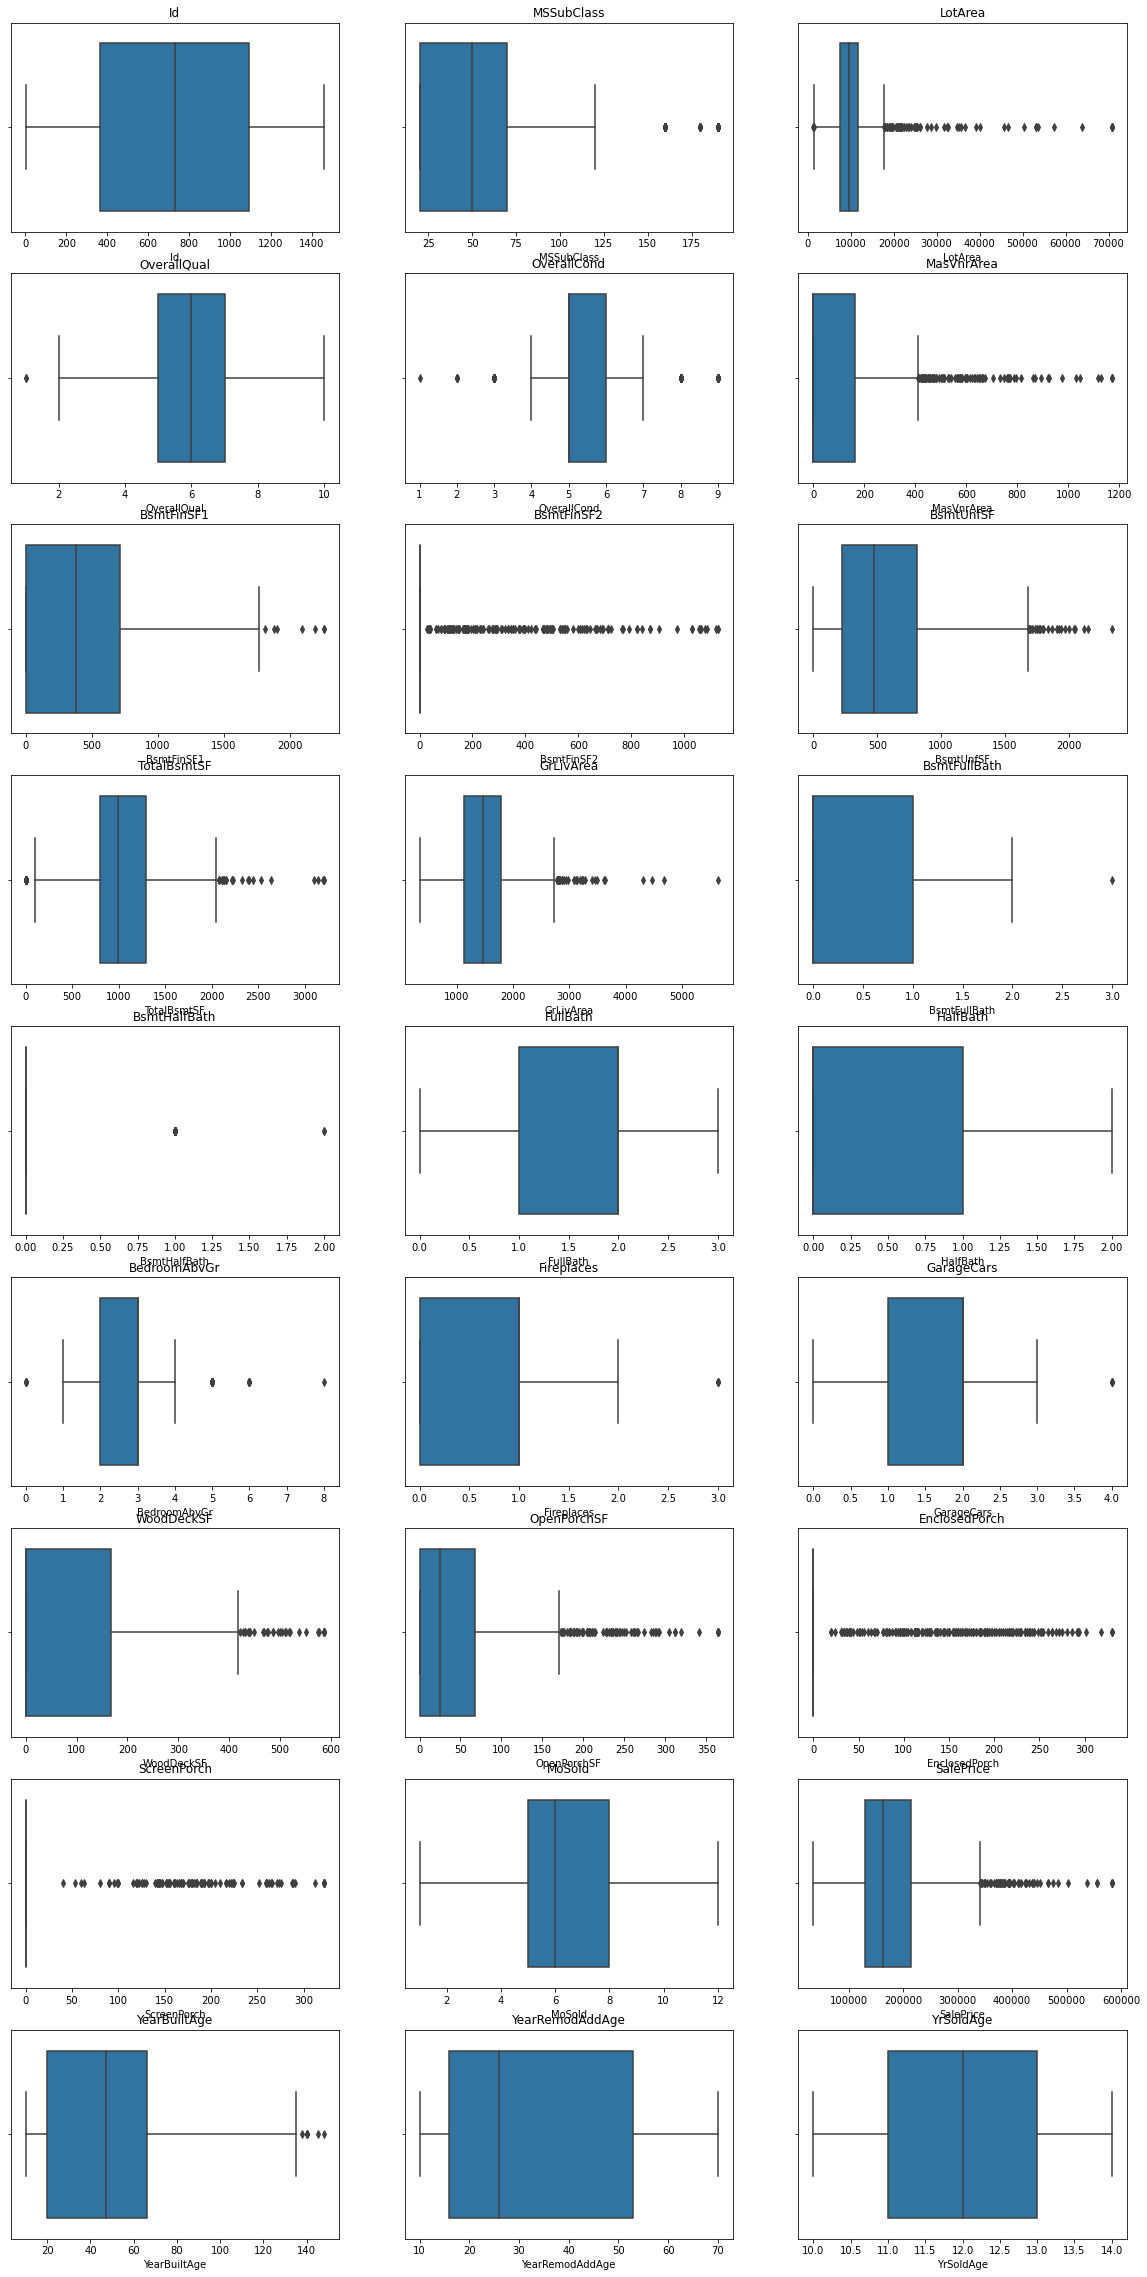

In [57]:
#Verifying after capping
plt.figure(figsize=(20,50))
j=1
for i in df.columns:
    
    if(df[i].dtype=='int64' or df[i].dtype=='float64'):
        
        plt.subplot(30//3+1,3,j)
        sns.boxplot(x=df[i])
        plt.title(i)
        j=j+1

### Analysis of SalePrice v/s Other columns

#### Numerical

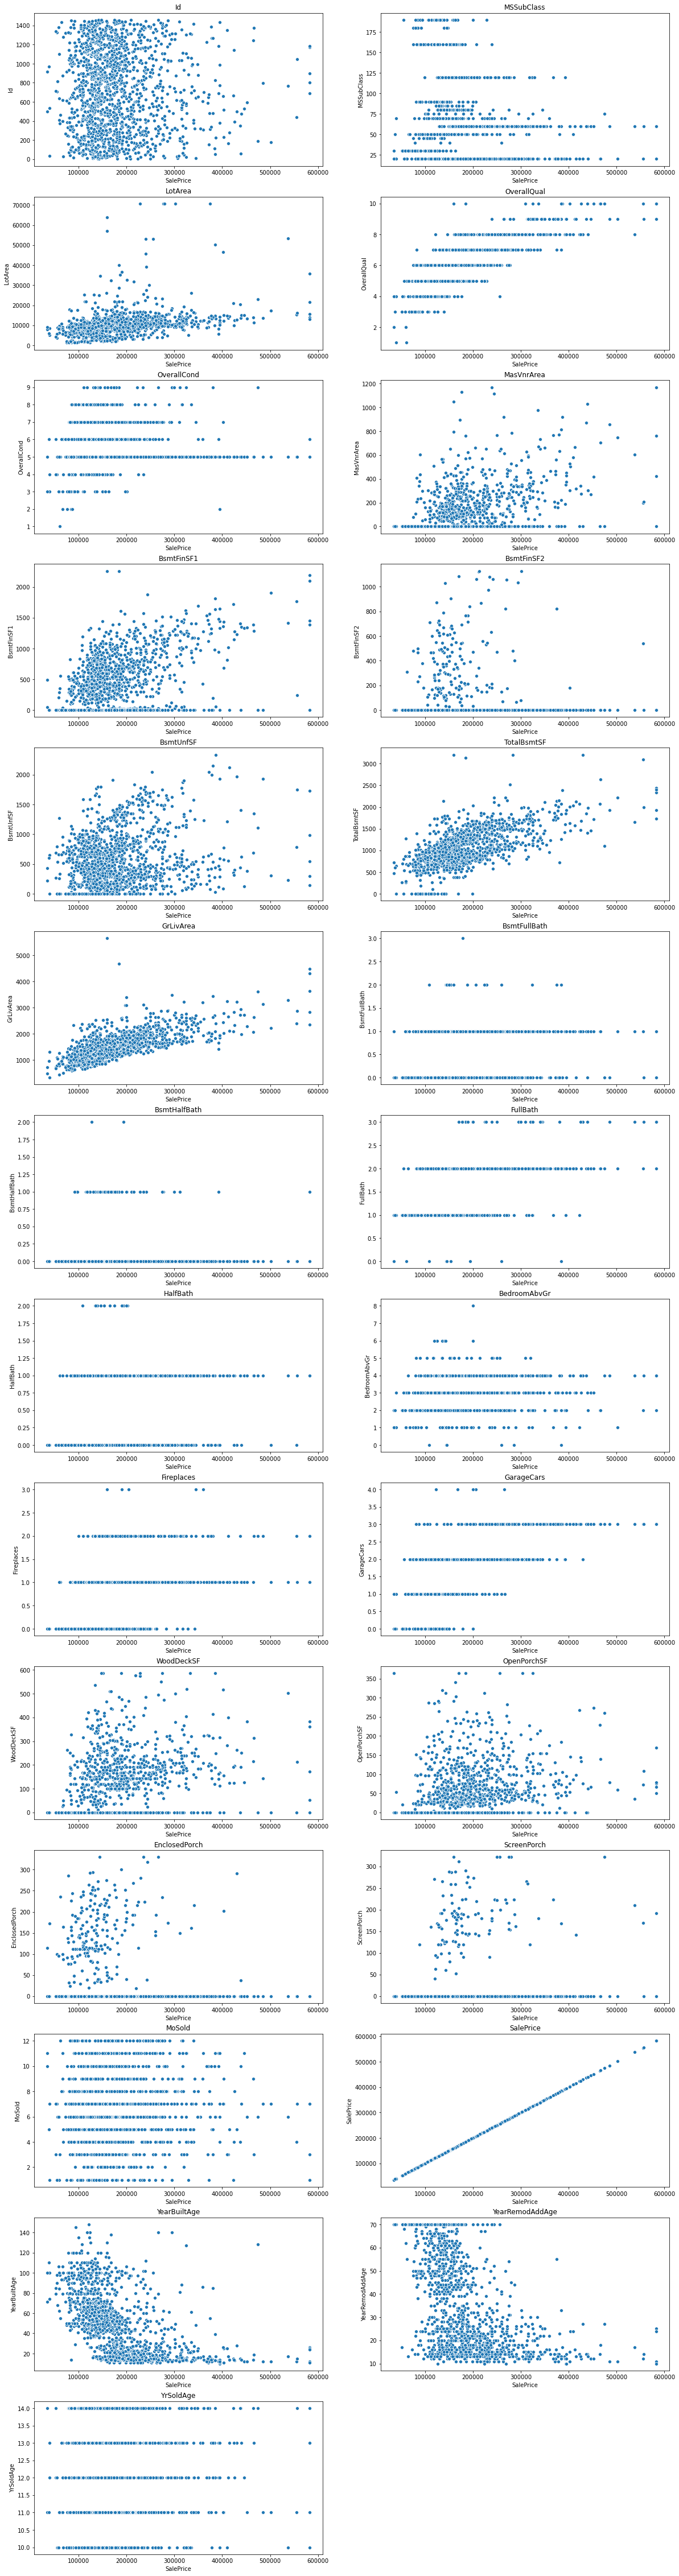

In [58]:
plt.figure(figsize=(20,100))
j=1
#df_cat= df.select_dtypes(include=['object'])
for i in df.columns:
    
    if(df[i].dtype=='float64' or df[i].dtype=='int64'):
        plt.subplot((35//2),2,j)
        sns.scatterplot(x=df['SalePrice'],y=df[i])
        plt.title(i)
        j=j+1

- MSSubClass 60 and 20 fall in higher price category
- LotArea min value increases as SalePrice increases. similar is the case with mx  price
- OverallCond is 5 for higher price range
- BsmtFinSF1 is higher as it increases
- BsmtFinSF2 is absent for higher price
- TotalBsmtSF is higher with increase in price
- BsmtFullBath is 1 or 0 for higher price
- BsmtHalfBath is 0 for higher price
- FullBath is 2 for higher price
- HalfBath is 1 for higher price
- BedroomAbvGr is 4 or below for higher price
- KitchenAbvGr is 1 for higher price
- TotalRmsAbvGrd is higher for higher price
- Fireplaces is 1 or 2 for higher price
- GarageCars is higher with price
- EnclosedProch is absent for higher price
- ScreenPorch is absent for many for higer price
- YearBuiltAge is less for higher price
- YearRemodAddAge is less for higher price



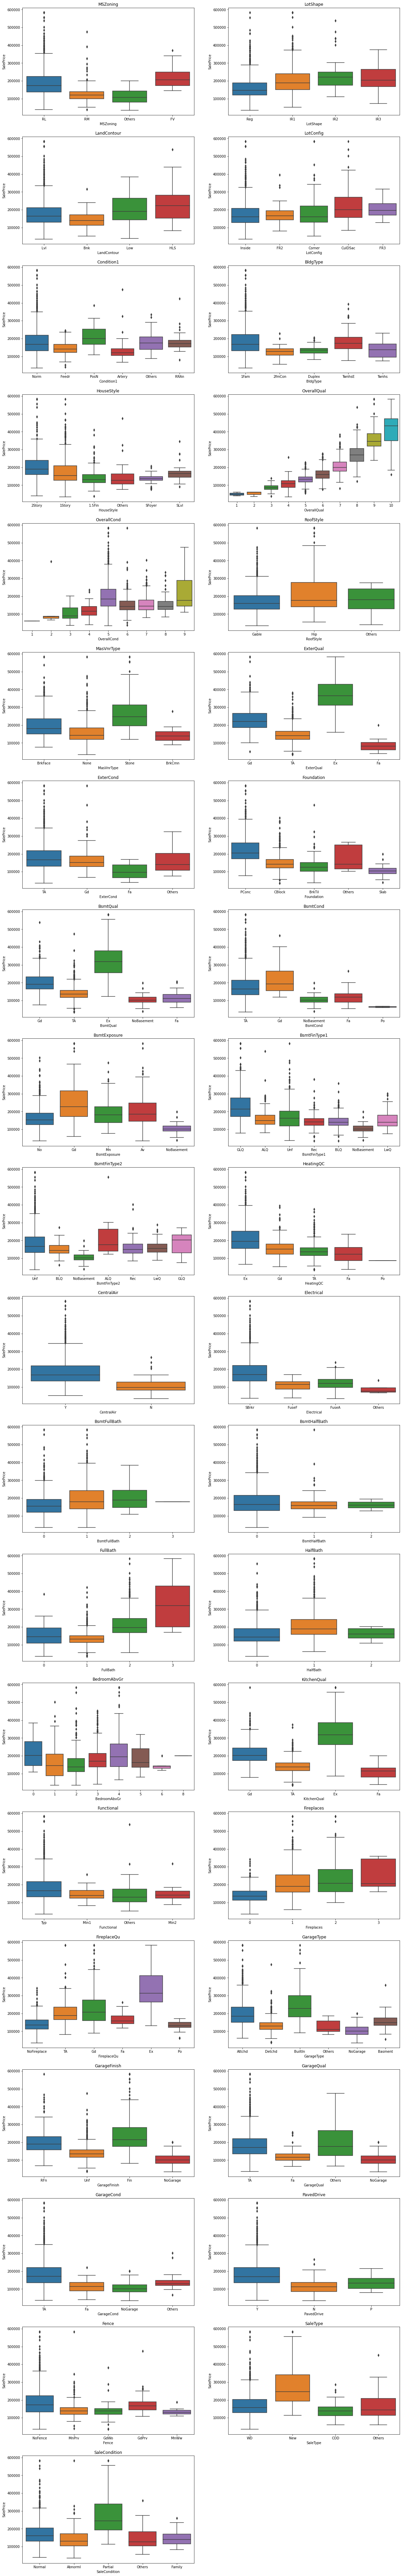

In [59]:
plt.figure(figsize=(20,160))
j=1
for i in df.columns:
    if(df[i].dtype=='object') or i in ['OverallQual','OverallCond','BsmtHalfBath','BsmtFullBath',
                                       'HalfBath','FullBath','BedroomAbvGr','Fireplaces','GarbageCars']:
        if(i!='Id' and i!='Exterior1st' and i!='Exterior2nd' and i!='Neighborhood'):
            plt.subplot(45//2+1,2,j)
            sns.boxplot(x=df[i],y=df['SalePrice'])
            plt.title(i)
            j=j+1

- MSZoning as RL has higher price
- LotShape is IR1 and Reg for higher price
- Landcontour is Lvl for higer price
- LotConfig id CulDSac and Inside for higer price
- Condition1 is Norm for higher price
- BldgType is lFam for higher price
- HouseStyle 2Story and 1Story for higher price
- RoofStyle is Hip for higher price, Others for lower
- MasVnrType is BrkCmn has lower price
- ExterQual is Ex and Gd for higher price and Fa for lower price
- ExterCond is TA has higher price
- Foundation PConc has higher price
- BsmtQual Ex has higher price and Fa has lower price
- BsmtCond as TA has higher price and as Fa or Po have only lower price
- BsmtExposure as Gd and Av have higher price and No Basement covers lower price
- BsmtFinType1 as GLQ and Unf have higher price and No Basement covers lower price
- BsmtFinType2 as Unf has higher price
- HeatingQC as Ex has higher price
- Central Air as Y has higher price
- Electrical as SBrkr has higher price
- KitchenQual as Ex has higher price and Fa is least
- Functional as Typ has higher price
- GarageType Attched and Builtin has higher price and without garage has lower price
- GarageFinish as Fin has highest price and without garage has lowest proce
- GarageQual TA has higher price without garage has least
- GarageCond TA has higher price
- PavedDrive as Y has highest price, N and P has lowest price
- SaleType as WD and New have higher price
- SaleCondition as Normal and Partial have higher prices

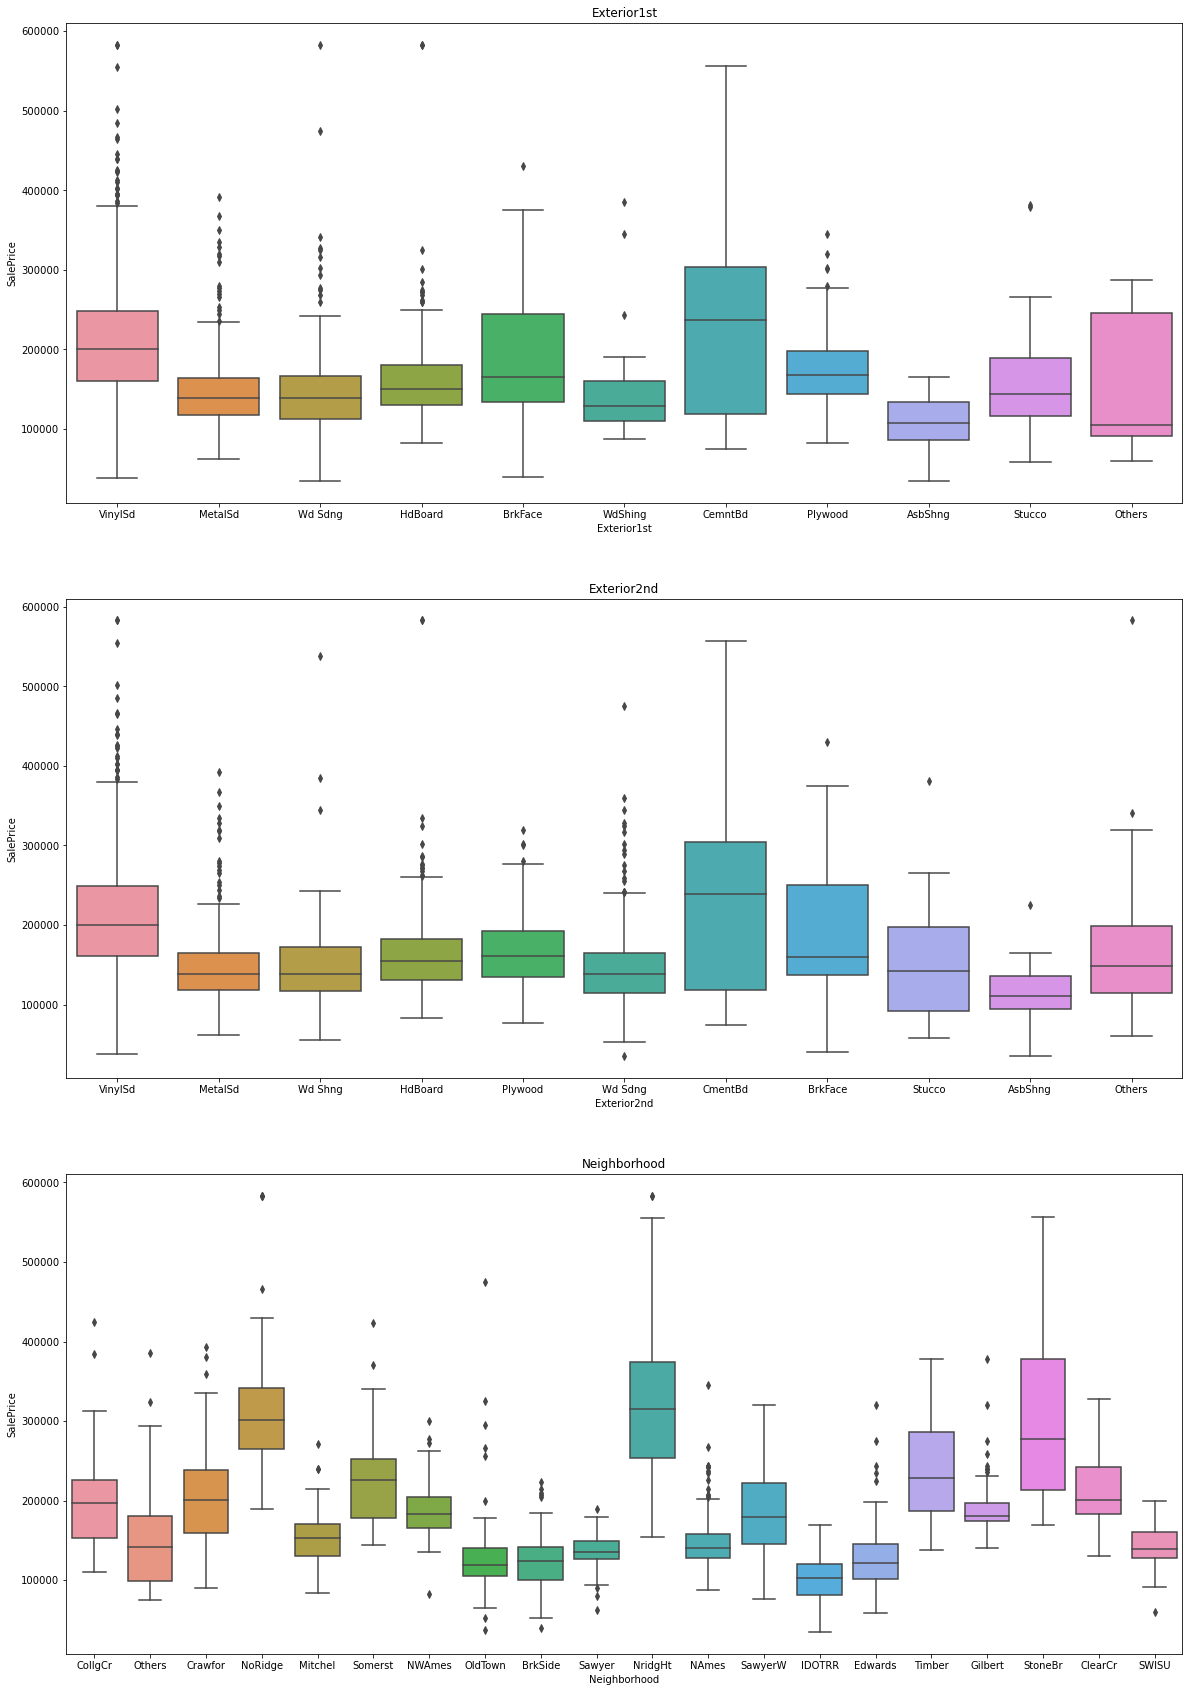

In [60]:
plt.figure(figsize=(20,30))
j=1
for i in ['MSSubClass','Exterior1st','Exterior2nd','Neighborhood','MoSold','YrSoldAge']:
    if(df[i].dtype!='int64' and df[i].dtype!='float64'):
        #if(i!='Id' and i!='Exterior1st' and i!='Exterior2nd' and i!='Neighborhood'):
        plt.subplot(3,1,j)
        sns.boxplot(x=df[i],y=df['SalePrice'])
        plt.title(i)
        j=j+1

- Exterior1st VinylSd, CemntBd occupy higher price
- Exterior2nd VinylSd, CemntBd occupy higher price
- Neighborhood NridgHt and StoneBr occupy higher price

## Verify target variable is normal

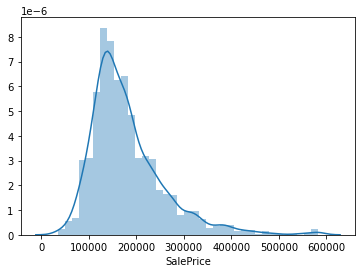

In [61]:
sns.distplot(df['SalePrice'])

In [62]:
print('Skewness for SalePrice:',skew(df['SalePrice']))

Skewness for SalePrice: 1.613033615025326


- Indicates that data is skewed(>0.5)
- From graph we observe data is skewed to the left
- To make it normal and symmetric, SalePrice is converted to its log

In [63]:
#Taking log of SalePrice
SalePrice_Orig=df['SalePrice']
df['SalePrice']=np.log(df['SalePrice'])

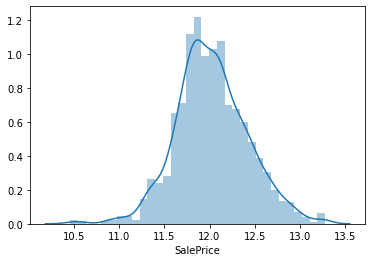

In [64]:
#Verifying data distribution of log 
sns.distplot(df['SalePrice'])

In [65]:
print('Skewness for SalePrice:',skew(df['SalePrice']))

Skewness for SalePrice: 0.08813227085295837


- Indicates that skewness is closer to 0, data is symmetric
- Graph also indicates the same, data is centred around 12

## Data Preparation

In [66]:
df_cat= df.select_dtypes(include=['object'])
df_cat.head()

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,Y,SBrkr,Gd,Typ,NoFireplace,Attchd,RFn,TA,TA,Y,NoFence,WD,Normal
1,RL,Reg,Lvl,FR2,Others,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NoFence,WD,Normal
2,RL,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NoFence,WD,Normal
3,RL,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NoFence,WD,Abnorml
4,RL,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NoFence,WD,Normal


In [67]:
for col in df_cat:
    print(col+": "+str(len(df_cat[col].unique()))+str(df_cat[col].unique()))

MSZoning: 4['RL' 'RM' 'Others' 'FV']
LotShape: 4['Reg' 'IR1' 'IR2' 'IR3']
LandContour: 4['Lvl' 'Bnk' 'Low' 'HLS']
LotConfig: 5['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Neighborhood: 20['CollgCr' 'Others' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'SWISU']
Condition1: 6['Norm' 'Feedr' 'PosN' 'Artery' 'Others' 'RRAn']
BldgType: 5['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: 6['2Story' '1Story' '1.5Fin' 'Others' 'SFoyer' 'SLvl']
RoofStyle: 3['Gable' 'Hip' 'Others']
Exterior1st: 11['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'Others']
Exterior2nd: 11['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Others']
MasVnrType: 4['BrkFace' 'None' 'Stone' 'BrkCmn']
ExterQual: 4['Gd' 'TA' 'Ex' 'Fa']
ExterCond: 4['TA' 'Gd' 'Fa' 'Others']
Foundation: 5['PConc' 'CBlo

In [68]:
# convert into dummies
df_dummies = pd.get_dummies(df_cat, drop_first=False)
df_dummies.drop(columns='CentralAir_N',inplace=True)
df_dummies.head()


,MSZoning_FV,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_Others,Condition1_PosN,Condition1_RRAn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Others,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Others,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_Others,Foundation_PConc,Foundation_Slab,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NoBasement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBasement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_Others,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Others,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_NoGarage,GarageType_Others,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_NoGarage,GarageQual_Others,GarageQual_TA,GarageCond_Fa,GarageCond_NoGarage,GarageCond_Others,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,SaleType_COD,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [69]:
for i in df_dummies.columns:
    print(i)

MSZoning_FV
MSZoning_Others
MSZoning_RL
MSZoning_RM
LotShape_IR1
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_Bnk
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_Corner
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_Others
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborhood_SawyerW
Neighborhood_Somerst
Neighborhood_StoneBr
Neighborhood_Timber
Condition1_Artery
Condition1_Feedr
Condition1_Norm
Condition1_Others
Condition1_PosN
Condition1_RRAn
BldgType_1Fam
BldgType_2fmCon
BldgType_Duplex
BldgType_Twnhs
BldgType_TwnhsE
HouseStyle_1.5Fin
HouseStyle_1Story
HouseStyle_2Story
HouseStyle_Others
HouseStyle_SFoyer
HouseStyle_SLvl
RoofStyle_Gable
RoofStyle_Hip
RoofStyle_Others
Exterior1s

In [70]:
# drop categorical variables 
df = df.drop(list(df_cat.columns), axis=1)

In [71]:
# concat dummy variables with X
df = pd.concat([df, df_dummies], axis=1)

In [72]:
df.shape

(1460, 211)

In [73]:
#Find list of columns with 95% or more data same
drop_list=[]
for i in df.columns:
    if(i!='Id'):
        #print(list(df[i].value_counts())[0])
        if((round(list(df[i].value_counts())[0]/len(df)*100),2)[0]>=95):
            drop_list.append(i)
print(drop_list)

['MSZoning_FV', 'MSZoning_Others', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Others', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Condition1_Artery', 'Condition1_Others', 'Condition1_PosN', 'Condition1_RRAn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_Others', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Others', 'Exterior1st_AsbShng', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_Others', 'Exterior1st_Stucco', 'Exterior1st_WdShing', 'Exterior2nd_AsbShng', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_Others', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 

In [74]:
#Drop columns identified in above step
df.drop(columns=drop_list,inplace=True)
df.shape

(1460, 117)

In [75]:
#Dropping ID column as it is not required 
df_ID=df['Id']
df=df.drop(columns=['Id'],axis=1)

In [76]:
#Splittling into y and X
y=df.pop('SalePrice')
X=df

In [77]:
# scaling the features


# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
scale=StandardScaler()
X = pd.DataFrame(scale.fit_transform(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
       ...
       'GarageCond_TA', 'PavedDrive_N', 'PavedDrive_Y', 'Fence_MnPrv',
       'Fence_NoFence', 'SaleType_New', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object', length=115)

In [78]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YearBuiltAge,YearRemodAddAge,YrSoldAge,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_NAmes,Neighborhood_OldTown,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,BldgType_1Fam,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NoGarage,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_NoGarage,GarageQual_TA,GarageCond_NoGarage,GarageCond_TA,PavedDrive_N,PavedDrive_Y,Fence_MnPrv,Fence_NoFence,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.280192,0.651479,-0.517200,0.525360,0.604650,-0.290528,-0.944591,-0.472715,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.951226,0.311725,-0.763017,0.230679,-0.363753,-0.275806,-1.599111,-1.050994,-0.878668,-0.138777,0.518133,-0.418955,-0.704203,0.760512,0.337126,-0.468739,-0.262324,0.622762,2.955221,-0.271163,-0.426833,-0.289638,-0.250182,-0.242360,0.39841,0.443533,-0.291025,-0.343391,-0.994535,1.510265,0.528753,-0.49357,-0.423464,-0.421212,-0.282633,1.354604,-0.405308,-0.406452,-0.414427,-0.328236,1.377253,-0.39494,1.510265,-1.217782,-0.309994,1.411313,-1.278819,-0.333333,0.37262,-0.333333,-0.876102,1.120968,-0.300609,1.167244,-0.894565,0.337126,-0.422338,-0.317893,-0.291025,0.728285,-0.421212,-0.335864,1.578868,-0.316585,-0.646124,0.401865,0.985043,-0.444638,-0.643994,0.263813,-0.262324,0.305995,-0.271163,1.221257,-1.006873,0.271163,-0.593171,1.056382,-0.522385,0.823505,-0.253259,-0.600559,-0.24236,-0.56364,-0.24236,1.568348,-0.841191,-0.24236,0.337126,-0.24236,0.317893,-0.256307,0.299253,-0.347118,0.488198,-0.301962,0.390293,-0.272616,0.467651,-0.305995
1,-0.872563,-0.102436,-0.071836,2.179628,-0.578055,1.226027,-0.290528,-0.641228,0.489589,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,0.600495,0.311725,1.663353,-0.724336,-0.363753,-0.275806,-0.489110,-0.156734,0.429577,0.614439,0.518133,-0.418955,-0.704203,0.760512,0.337126,-0.468739,-0.262324,-1.605749,-0.338384,-0.271163,-0.426833,-0.289638,-0.250182,4.126099,-2.50998,0.443533,-0.291025,-0.343391,1.005495,-0.662136,0.528753,-0.49357,-0.423464,2.374103,-0.282633,-0.738223,-0.405308,-0.406452,2.412971,-0.328236,-0.726083,-0.39494,-0.662136,0.821165,-0.309994,-0.708560,0.781971,-0.333333,0.37262,-0.333333,1.141420,-0.892086,-0.300609,1.167244,-0.894565,0.337126,-0.422338,3.145715,-0.291025,-1.373090,2.374103,-0.335864,-0.633365,-0.316585,-0.646124,0.401865,0.985043,-0.444638,-0.643994,0.263813,-0.262324,0.305995,-0.271163,-0.818829,0.993174,0.271163,-0.593171,-0.946628,1.914298,0.823505,-0.253259,-0.600559,-0.24236,-0.56364,-0.24236,1.568348,-0.841191,-0.24236,0.337126,-0.24236,0.317893,-0.256307,0.299253,-0.347118,0.488198,-0.301962,0.390293,-0.272616,0.467651,-0.305995
2,0.073375,0.152606,0.

In [79]:
# RFE()

In [80]:
# pre_process = PolynomialFeatures(degree=2)
# # Transform our x input to 1, x and x^2
# X_poly = pre_process.fit_transform(X)
# # Show the transformation on the notebook
# X_poly

In [81]:
# split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## SVR Regression

In [82]:
params = {'degree': [3,4],'C':[0.001,0.01,0.1,1,100],'coef0':[1,10,50,100,200,400,600]}


svr = SVR(kernel='poly')

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = svr, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:  4.1min finished


GridSearchCV(cv=5, estimator=SVR(kernel='poly'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 100],
                         'coef0': [1, 10, 50, 100, 200, 400, 600],
                         'degree': [3, 4]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
cv_results = pd.DataFrame(model_cv.cv_results_)
# cv_results = cv_results[cv_results['param_alpha']<=4000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_coef0,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.080303,0.001956,0.019099,0.000118,0.001,1,3,"{'C': 0.001, 'coef0': 1, 'degree': 3}",-0.184887,-0.188641,-0.180868,-0.173039,-0.192436,-0.183974,0.006685,70,-0.181307,-0.177377,-0.177336,-0.182056,-0.178732,-0.179362,0.001974
1,0.074244,0.001005,0.018182,0.000473,0.001,1,4,"{'C': 0.001, 'coef0': 1, 'degree': 4}",-0.157709,-0.166917,-0.160019,-0.146778,-0.166415,-0.159568,0.007323,69,-0.151004,-0.148120,-0.147962,-0.152559,-0.149721,-0.149873,0.001746
2,0.073340,0.000664,0.011428,0.000374,0.001,10,3,"{'C': 0.001, 'coef0': 10, 'degree': 3}",-0.084280,-0.094817,-0.093960,-0.077137,-0.082858,-0.086610,0.006791,1,-0.075299,-0.071832,-0.072381,-0.074462,-0.074981,-0.073791,0.001412
3,0.097129,0.006684,0.013458,0.001588,0.001,10,4,"{'C': 0.001, 'coef0': 10, 'degree': 4}",-0.085915,-0.100281,-0.089372,-0.089654,-0.092284,-0.091501,0.004834,7,-0.063750,-0.063971,-0.064476,-0.064713,-0.064873,-0.064357,0.000430
4,0.188017,0.007487,0.012341,0.000235,0.001,50,3,"{'C': 0.001, 'coef0': 50, 'degree': 3}",-0.089114,-0.098664,-0.092647,-0.089896,-0.085727,-0.091210,0.004332,6,-0.065436,-0.065261,-0.066348,-0.066415,-0.066619,-0.066016,0.000555
5,0.197225,0.007458,0.013166,0.000187,0.001,50,4,"{'C': 0.001, 'coef0': 50, 'degree': 4}",-0.089593,-0.100544,-0.090102,-0.092267,-0.092588,-0.093019,0.003940,19,-0.063936,-0.063531,-0.064631,-0.064753,-0.064866,-0.064343,0.000519
6,0.389115,0.011906,0.012863,0.000229,0.001,100,3,"{'C': 0.001, 'coef0': 100, 'degree': 3}",-0.089608,-0.100329,-0.091750,-0.092380,-0.089343,-0.092682,0.004001,15,-0.063333,-0.063456,-0.064496,-0.064839,-0.065415,-0.064308,0.000802
7,0.322228,0.022037,0.012893,0.000095,0.001,100,4,"{'C': 0.001, 'coef0': 100, 'degree': 4}",-0.090382,-0.100325,-0.090542,-0.093187,-0.092756,-0.093438,0.003624,28,-0.064045,-0.063474,-0.064614,-0.064737,-0.064885,-0.064351,0.000523
8,0.784590,0.033709,0.012859,0.000256,0.001,200,3,"{'C': 0.001, 'coef0': 200, 'degree': 3}",-0.091031,-0.100075,-0.090859,-0.094110,-0.092826,-0.093780,0.003369,42,-0.064154,-0.063462,-0.064531,-0.064747,-0.064896,-0.064358,0.000513
9,0.557172,0.032810,0.013022,0.000145,0.001,200,4,"{'C': 0.001, 'coef0': 200, 'degree': 4}",-0.090832,-0.100190,-0.090757,-0.093874,-0.092896,-0.093710,0.003455,37,-0.064111,-0.063465,-0.064563,-0.064698,-0.064893,-0.064346,0.000510


In [84]:
params=[  str(i['C'])+'_'+str(i['degree'])+'_'+str(i['coef0']) for i in cv_results['params']]


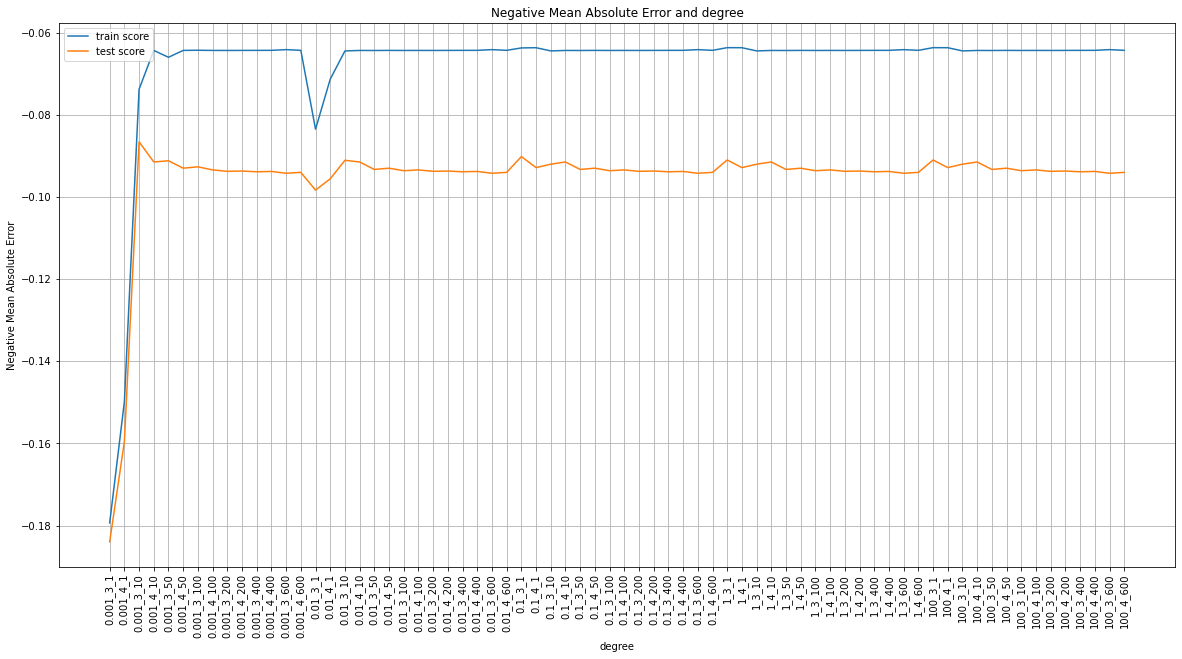

In [85]:
#plt.figure(figsize=(20,8))
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(20,10))

# plotting
plt.plot(params, cv_results['mean_train_score'])
plt.plot(params, cv_results['mean_test_score'])
plt.xlabel('degree')
plt.xticks(rotation=90)
# plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and degree")
plt.legend(['train score', 'test score'], loc='upper left')

plt.grid()

- alpha=100 looks like a good value
- Error is highly soping towards negative after that

In [86]:
#Creating model with alpha =100
alpha = 100
svr = SVR(kernel='poly',degree=3,coef0=10,C=0.001)

svr.fit(X_train, y_train)
#list(ridge.coef_)

SVR(C=0.001, coef0=10, kernel='poly')

In [87]:
# predict and get r2_score
y_train_pred = svr.predict(X_train)
print('Train R2_score: {}'.format(r2_score(y_true=y_train, y_pred=y_train_pred)))
y_test_pred = svr.predict(X_test)
print('Test R2_score: {}'.format(r2_score(y_true=y_test, y_pred=y_test_pred)))

Train R2_score: 0.9196406548981996
Test R2_score: 0.8966433017647829


In [88]:
#Storing coefficient to dictionary
coeff=list(svr.dual_coef_)
col=list(X.columns)
comb={}
for i in enumerate(col):
    comb[i[1]]=coeff[0][i[0]]
# coeff[0][4]

In [89]:
#Sorting based on dictionary values
comb1={k: v for k, v in sorted(comb.items(), key=lambda dict_key: abs(dict_key[1]),reverse=True)}

In [90]:
#Top 20 variables in model
for i in enumerate(comb1.keys()):
    if(i[0]<20):
        print('{}: {}'.format(i[1],round(comb[i[1]],5)))

MSSubClass: -0.001
OverallQual: 0.001
MasVnrArea: 0.001
BsmtFinSF1: -0.001
BsmtUnfSF: 0.001
TotalBsmtSF: -0.001
BsmtFullBath: -0.001
Fireplaces: 0.001
EnclosedPorch: 0.001
YearBuiltAge: -0.001
LotShape_IR1: -0.001
LotConfig_CulDSac: 0.001
Neighborhood_OldTown: -0.001
BldgType_1Fam: -0.001
HouseStyle_1.5Fin: -0.001
RoofStyle_Gable: 0.001
RoofStyle_Hip: 0.001
Exterior1st_Plywood: 0.001
Exterior1st_VinylSd: 0.001
Exterior2nd_MetalSd: -0.001


In [91]:
test_df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [92]:
test_df.isnull().sum()/len(df)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.273973
LotFrontage      15.547945
LotArea           0.000000
Street            0.000000
Alley            92.602740
LotShape          0.000000
LandContour       0.000000
Utilities         0.136986
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.068493
Exterior2nd       0.068493
MasVnrType        1.095890
MasVnrArea        1.027397
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          3.013699
BsmtCond          3.082192
BsmtExposure      3.013699
BsmtFinType1      2.876712
BsmtFinSF1        0.068493
BsmtFinType2      2.876712
BsmtFinSF2        0.068493
B

In [93]:
for col in test_df.columns:
    if col in convert_others.keys():
        test_df=test_df.replace({col:convert_others[col]})

In [94]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [95]:
#Find Age from 2020 and store as Age columns
test_df['YearBuiltAge']=2020-test_df['YearBuilt']
test_df['YearRemodAddAge']=2020-test_df['YearRemodAdd']
test_df['YrSoldAge']=2020-test_df['YrSold']

In [96]:
# test_df['BsmtUnfSF'].unique()

In [97]:
#Replace null values with NoGarage in categorical Garage Columns and 0 in Garage Cars
df1=test_df['GarageType'].isnull() & test_df['GarageFinish'].isnull() & test_df['GarageQual'].isnull() & test_df['GarageCond'].isnull()
for i in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    if(i!='GarageCars'):
        test_df[i][df1]=test_df[i][df1].fillna(value='NoGarage',axis=0)        

test_df['GarageCars'][df1]=0

In [98]:
# test_df[test_df['GarageType']=='Detchd']

In [99]:
Gar_list

['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [100]:
BsmtCol=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','TotalBsmtSF','BsmtFinSF2', 'BsmtUnfSF']
#Checking null values for other Garage columns where GarageType is null
df1=test_df[BsmtCol[0]].isnull() & test_df[BsmtCol[1]].isnull() & test_df[BsmtCol[2]].isnull() & test_df[BsmtCol[3]].isnull() & test_df[BsmtCol[5]].isnull() 
index=list(test_df[df1].index)
for col in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    for ind in index:
        test_df.loc[ind,col]='NoBasement'
        
for col in ['BsmtFullBath','BsmtHalfBath','BsmtFinSF1','TotalBsmtSF','BsmtFinSF2', 'BsmtUnfSF']:
    test_df[col][df1]=0

In [101]:
# test_df['BsmtUnfSF'].unique()

In [102]:
for i in cat_mode.keys():
    test_df[i].fillna(value=cat_mode[i],inplace=True)

In [103]:
i='MasVnrArea'
# v=df[i].median()
# print('Null count before imputation:\t{}'.format(df[i].isnull().sum()))
test_df[i]=test_df[i].fillna(value=v)

In [104]:
test_df.isnull().sum()

Id                    0
MSSubClass            0
MSZoning              4
LotFrontage         227
LotArea               0
Street                0
Alley              1352
LotShape              0
LandContour           0
Utilities             2
LotConfig             0
LandSlope             0
Neighborhood          0
Condition1            0
Condition2            0
BldgType              0
HouseStyle            0
OverallQual           0
OverallCond           0
YearBuilt             0
YearRemodAdd          0
RoofStyle             0
RoofMatl              0
Exterior1st           1
Exterior2nd           1
MasVnrType            0
MasVnrArea            0
ExterQual             0
ExterCond             0
Foundation            0
BsmtQual             43
BsmtCond             44
BsmtExposure          0
BsmtFinType1         41
BsmtFinSF1            0
BsmtFinType2          0
BsmtFinSF2            0
BsmtUnfSF             0
TotalBsmtSF           0
Heating               0
HeatingQC             0
CentralAir      

In [105]:
test_df[test_df['BsmtFullBath'].isnull()].index

Int64Index([728], dtype='int64')

In [106]:
for col in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
        test_df.loc[728,col]='NoBasement'
        
for col in ['BsmtFullBath','BsmtHalfBath','BsmtFinSF1','TotalBsmtSF','BsmtFinSF2', 'BsmtUnfSF']:
    test_df.loc[728,col]=0

In [107]:
test_df[test_df['GarageCars'].isnull()].index

Int64Index([1116], dtype='int64')

In [108]:
test_df[test_df['GarageFinish'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,YearBuiltAge,YearRemodAddAge,YrSoldAge
666,2127,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,Others,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,NoFireplace,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,Y,64,0,180,0,0,0,NaN,MnPrv,Shed,1000,9,2008,WD,Normal,110,37,12
1116,2577,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NoFireplace,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Others,97,21,13


In [109]:
test_df[test_df['BsmtUnfSF']=='NoGarage']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,YearBuiltAge,YearRemodAddAge,YrSoldAge


In [110]:
for i in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    test_df.loc[1116,i]='NoGarage'   

    test_df.loc[1116,'GarageCars']=0

In [111]:
Gar_list

['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [112]:
test_df[test_df['BsmtUnfSF']=='NoGarage'].index

Int64Index([], dtype='int64')

In [113]:
#Get unique list of columns present in model
col_list=[]
for col in list(comb.keys()):
    if '_' in col:
        column=col[0:col.find('_',1,len(col))]
        if column not in col_list:
            col_list.append(column)
    else:
        col_list.append(col)
# test_df=test_df[col_list].copy()

In [114]:
X_test_df=test_df[col_list]

In [115]:
X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 59 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1459 non-null   int64  
 1   LotArea          1459 non-null   int64  
 2   OverallQual      1459 non-null   int64  
 3   OverallCond      1459 non-null   int64  
 4   MasVnrArea       1459 non-null   float64
 5   BsmtFinSF1       1459 non-null   float64
 6   BsmtFinSF2       1459 non-null   float64
 7   BsmtUnfSF        1459 non-null   float64
 8   TotalBsmtSF      1459 non-null   float64
 9   GrLivArea        1459 non-null   int64  
 10  BsmtFullBath     1459 non-null   float64
 11  BsmtHalfBath     1459 non-null   float64
 12  FullBath         1459 non-null   int64  
 13  HalfBath         1459 non-null   int64  
 14  BedroomAbvGr     1459 non-null   int64  
 15  Fireplaces       1459 non-null   int64  
 16  GarageCars       1459 non-null   float64
 17  WoodDeckSF    

In [116]:
# for col in ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']

In [117]:
k=list(filter(lambda x:x[1]==True,list((X_test_df.isnull().sum()/len(df)*100>0).items())))
test_null=[x[0] for x in k ]


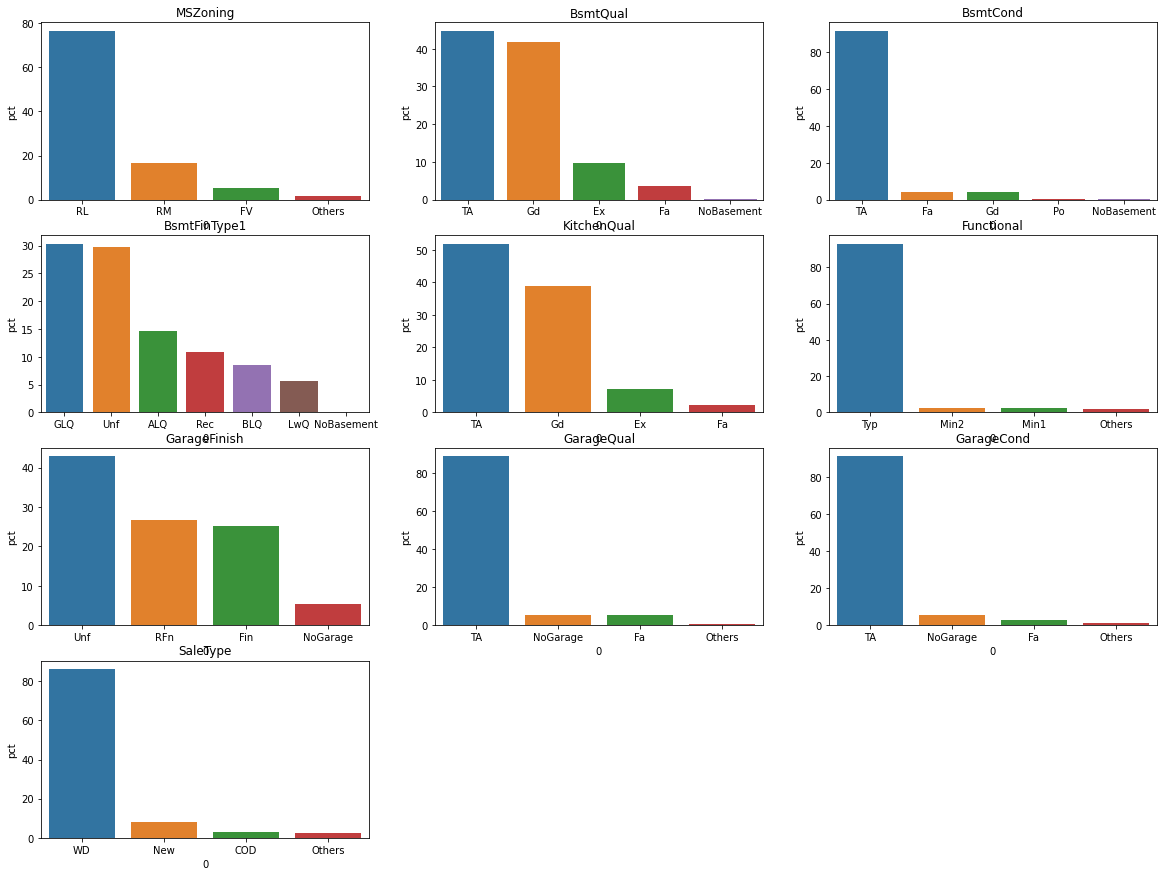

In [118]:
plt.figure(figsize=(20,15))
fig_num=1
single=[]
# test_pct=test_df[]
for i in test_null:
    if(test_df[i].dtype=='object'):
        if(i!='Id' and i!='Exterior1st' and i!='Exterior2nd' and i!='Neighborhood'):
#             test_pct=pd.DataFrame({'column':test_df[i].unique()})
            test_pct=pd.DataFrame(test_df[i].value_counts().items() )
            test_pct['pct']=test_pct[1]/test_pct[1].sum()*100
            plt.subplot(10//3+1,3,fig_num)
            sns.barplot(x=test_pct[0],y=test_pct['pct'])
            plt.title(i)
            fig_num+=1
        else:
            single.append(i)

- MSZoning -RL is 80%, hence use mode
- BsmtQual -TA and Gd is 40% each, hence fill 50% with TA and 50% Gd
- BsmtCond - TA is above 80%, hence use mode
- KitchenQual - TA 50%, Gd 40%, hence fill TA 50% and Gd 50% 
- Functional -Typ  is above 80% hence use mode
- SaleType - WD is above 80% hence use mode

In [119]:
X_test_df.fillna(value={'MSZoning':'RL','BsmtCond':'TA','Functional':'Typ','SaleType':'WD','KitchenQual':'TA','BsmtQual':'TA'},inplace=True)


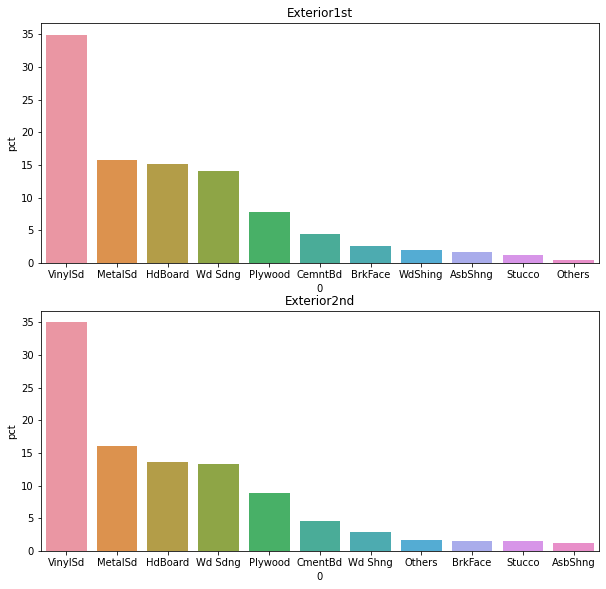

In [120]:
plt.figure(figsize=(10,15))
fig_num=1
for i in single:
    test_pct=pd.DataFrame(test_df[i].value_counts().items() )
    test_pct['pct']=test_pct[1]/test_pct[1].sum()*100
    plt.subplot(3,1,fig_num)
    sns.barplot(x=test_pct[0],y=test_pct['pct'])
    plt.title(i)
    fig_num+=1

- Fill with mode value  as only one column needs to be filled

In [121]:
X_test_df.fillna(value={'Exterior1st':'VinylSd','Exterior2nd':'VinylSd'},inplace=True)


In [122]:
X_test_df.isnull().sum()

MSSubClass          0
LotArea             0
OverallQual         0
OverallCond         0
MasVnrArea          0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
Fireplaces          0
GarageCars          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
ScreenPorch         0
MoSold              0
YearBuiltAge        0
YearRemodAddAge     0
YrSoldAge           0
MSZoning            0
LotShape            0
LandContour         0
LotConfig           0
Neighborhood        0
Condition1          0
BldgType            0
HouseStyle          0
RoofStyle           0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1       40
BsmtFinType2        0
HeatingQC 

In [123]:
df_cat= X_test_df.select_dtypes(include=['object'])
cat_col=[]
for col in df_cat:
    if(col not in ['BsmtFullBath','BsmtHalfBath','BsmtFinSF1','TotalBsmtSF','BsmtFinSF2', 'BsmtUnfSF'] ):
        print(col+": "+str(len(df_cat[col].unique()))+str(df_cat[col].unique()))
        cat_col.append(col)
    

MSZoning: 4['Others' 'RL' 'RM' 'FV']
LotShape: 4['Reg' 'IR1' 'IR2' 'IR3']
LandContour: 4['Lvl' 'HLS' 'Bnk' 'Low']
LotConfig: 5['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
Neighborhood: 20['NAmes' 'Gilbert' 'StoneBr' 'Others' 'NridgHt' 'NoRidge' 'Somerst'
 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide' 'ClearCr' 'SWISU'
 'Edwards' 'CollgCr' 'Crawfor' 'IDOTRR' 'Mitchel' 'Timber']
Condition1: 6['Feedr' 'Norm' 'PosN' 'Others' 'Artery' 'RRAn']
BldgType: 5['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
HouseStyle: 6['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' 'Others']
RoofStyle: 3['Gable' 'Hip' 'Others']
Exterior1st: 11['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'Others' 'Stucco']
Exterior2nd: 11['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'Others' 'CmentBd'
 'Wd Shng' 'AsbShng' 'Stucco' 'BrkFace']
MasVnrType: 4['None' 'BrkFace' 'Stone' 'BrkCmn']
ExterQual: 4['TA' 'Gd' 'Ex' 'Fa']
ExterCond: 4['TA' 'Gd' 'Fa' 'Others']
Foundation: 5['CBlock' 'PCo

In [124]:
#change column type
df_cat=X_test_df[cat_col]


In [125]:
df_cat

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,Others,Reg,Lvl,Inside,NAmes,Feedr,1Fam,1Story,Gable,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,TA,Y,SBrkr,TA,Typ,NoFireplace,Attchd,Unf,TA,TA,Y,MnPrv,WD,Normal
1,RL,IR1,Lvl,Corner,NAmes,Norm,1Fam,1Story,Hip,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,TA,Y,SBrkr,Gd,Typ,NoFireplace,Attchd,Unf,TA,TA,Y,NoFence,WD,Normal
2,RL,IR1,Lvl,Inside,Gilbert,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,MnPrv,WD,Normal
3,RL,IR1,Lvl,Inside,Gilbert,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,NoFence,WD,Normal
4,RL,IR1,HLS,Inside,StoneBr,Norm,TwnhsE,1Story,Gable,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,Ex,Y,SBrkr,Gd,Typ,NoFireplace,Attchd,RFn,TA,TA,Y,NoFence,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Reg,Lvl,Inside,Others,Norm,Twnhs,2Story,Gable,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,Gd,Y,SBrkr,TA,Typ,NoFireplace,NoGarage,NoGarage,NoGarage,NoGarage,Y,NoFence,WD,Normal
1455,RM,Reg,Lvl,Inside,Others,Norm,TwnhsE,2Story,Gable,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,TA,Y,SBrkr,TA,Typ,NoFireplace,Others,Unf,TA,TA,Y,NoFence,WD,Abnorml
1456,RL,Reg,Lvl,Inside,Mitchel,Norm,1Fam,1Story,Gable,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,Ex,Y,SBrkr,TA,Typ,TA,Detchd,Unf,TA,TA,Y,NoFence,WD,Abnorml
1457,RL,Reg,Lvl,Inside,Mitchel,Norm,1Fam,SFoyer,Gable,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,TA,Y,SBrkr,TA,Typ,NoFireplace,NoGarage,NoGarage,NoGarage,NoGarage,Y,MnPrv,WD,Normal


In [126]:
# convert into dummies
df_dummies = pd.get_dummies(df_cat, drop_first=False)
df_dummies.drop(columns='CentralAir_N',inplace=True)
df_dummies.head()


,MSZoning_FV,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_Others,Condition1_PosN,Condition1_RRAn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Others,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Others,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_Others,Foundation_PConc,Foundation_Slab,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NoBasement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBasement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_Others,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Others,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_NoGarage,GarageType_Others,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_NoGarage,GarageQual_Others,GarageQual_TA,GarageCond_Fa,GarageCond_NoGarage,GarageCond_Others,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,SaleType_COD,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [127]:
print(X_test_df.columns)

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YearBuiltAge',
       'YearRemodAddAge', 'YrSoldAge', 'MSZoning', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [128]:
# drop categorical variables 
X_test_df = X_test_df.drop(cat_col, axis=1)



In [129]:
# drop_col=[]
# for col in X_test_df.columns:
#     if col not in comb1.keys():
#         drop_col.append(col)



In [130]:
# X_test_df.drop(columns=drop_col,inplace=True)

In [131]:
# drop_col

In [132]:
# X_test_df.isnull().sum()

In [133]:
comb1.keys()

dict_keys(['MSSubClass', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'Fireplaces', 'EnclosedPorch', 'YearBuiltAge', 'LotShape_IR1', 'LotConfig_CulDSac', 'Neighborhood_OldTown', 'BldgType_1Fam', 'HouseStyle_1.5Fin', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_Plywood', 'Exterior1st_VinylSd', 'Exterior2nd_MetalSd', 'Exterior2nd_Plywood', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Gd', 'ExterCond_Gd', 'ExterCond_TA', 'BsmtQual_Ex', 'BsmtExposure_Av', 'BsmtExposure_Mn', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'HeatingQC_TA', 'CentralAir_Y', 'KitchenQual_Ex', 'KitchenQual_TA', 'Functional_Typ', 'FireplaceQu_Gd', 'FireplaceQu_TA', 'GarageType_BuiltIn', 'GarageFinish_NoGarage', 'GarageFinish_Unf', 'GarageQual_NoGarage', 'GarageCond_NoGarage', 'PavedDrive_N', 'PavedDrive_Y', 'SaleCondition_Abnorml', 'SaleCondition_Normal', 'SaleCondition_Partial', 'Condition1_Norm', 'HouseStyle_1S

In [134]:
# concat dummy variables with X
X_test_df = pd.concat([X_test_df, df_dummies], axis=1)


In [135]:
X_test_df=X_test_df[comb1.keys()]

In [136]:
for i in X_test_df.columns:
    if i not in comb.keys():
        print(i+'-')
    else:
        print(i+'+')
# X_test_df=X_test_df[comb1.keys()]

MSSubClass+
OverallQual+
MasVnrArea+
BsmtFinSF1+
BsmtUnfSF+
TotalBsmtSF+
BsmtFullBath+
Fireplaces+
EnclosedPorch+
YearBuiltAge+
LotShape_IR1+
LotConfig_CulDSac+
Neighborhood_OldTown+
BldgType_1Fam+
HouseStyle_1.5Fin+
RoofStyle_Gable+
RoofStyle_Hip+
Exterior1st_Plywood+
Exterior1st_VinylSd+
Exterior2nd_MetalSd+
Exterior2nd_Plywood+
MasVnrType_None+
MasVnrType_Stone+
ExterQual_Gd+
ExterCond_Gd+
ExterCond_TA+
BsmtQual_Ex+
BsmtExposure_Av+
BsmtExposure_Mn+
BsmtFinType1_ALQ+
BsmtFinType1_BLQ+
BsmtFinType1_GLQ+
BsmtFinType1_Rec+
BsmtFinType1_Unf+
HeatingQC_TA+
CentralAir_Y+
KitchenQual_Ex+
KitchenQual_TA+
Functional_Typ+
FireplaceQu_Gd+
FireplaceQu_TA+
GarageType_BuiltIn+
GarageFinish_NoGarage+
GarageFinish_Unf+
GarageQual_NoGarage+
GarageCond_NoGarage+
PavedDrive_N+
PavedDrive_Y+
SaleCondition_Abnorml+
SaleCondition_Normal+
SaleCondition_Partial+
Condition1_Norm+
HouseStyle_1Story+
HouseStyle_2Story+
MoSold+
Exterior2nd_Wd Sdng+
Foundation_BrkTil+
HeatingQC_Ex+
MasVnrType_BrkFace+
WoodDeckS

In [137]:
len(X_test_df.columns)

115

In [138]:
[i for i in X_test_df.isnull().sum().items()]

[('MSSubClass', 0),
 ('OverallQual', 0),
 ('MasVnrArea', 0),
 ('BsmtFinSF1', 0),
 ('BsmtUnfSF', 0),
 ('TotalBsmtSF', 0),
 ('BsmtFullBath', 0),
 ('Fireplaces', 0),
 ('EnclosedPorch', 0),
 ('YearBuiltAge', 0),
 ('LotShape_IR1', 0),
 ('LotConfig_CulDSac', 0),
 ('Neighborhood_OldTown', 0),
 ('BldgType_1Fam', 0),
 ('HouseStyle_1.5Fin', 0),
 ('RoofStyle_Gable', 0),
 ('RoofStyle_Hip', 0),
 ('Exterior1st_Plywood', 0),
 ('Exterior1st_VinylSd', 0),
 ('Exterior2nd_MetalSd', 0),
 ('Exterior2nd_Plywood', 0),
 ('MasVnrType_None', 0),
 ('MasVnrType_Stone', 0),
 ('ExterQual_Gd', 0),
 ('ExterCond_Gd', 0),
 ('ExterCond_TA', 0),
 ('BsmtQual_Ex', 0),
 ('BsmtExposure_Av', 0),
 ('BsmtExposure_Mn', 0),
 ('BsmtFinType1_ALQ', 0),
 ('BsmtFinType1_BLQ', 0),
 ('BsmtFinType1_GLQ', 0),
 ('BsmtFinType1_Rec', 0),
 ('BsmtFinType1_Unf', 0),
 ('HeatingQC_TA', 0),
 ('CentralAir_Y', 0),
 ('KitchenQual_Ex', 0),
 ('KitchenQual_TA', 0),
 ('Functional_Typ', 0),
 ('FireplaceQu_Gd', 0),
 ('FireplaceQu_TA', 0),
 ('GarageType_Bui

In [139]:
X_test_df=pd.DataFrame(scale.transform(X_test_df))

In [140]:
# for i in X_test_df.columns:
#     if('NoGarage') in list(X_test_df[i].unique()):
#         print(i+": "+str(list(X_test_df[i].unique())))

In [141]:
y_new_pred = svr.predict(X_test_df)

In [142]:
y_new_pred

array([ 552381.28624284, 1142371.76554907, 1387065.10233285, ...,
       2122620.49877547,  459378.57658659,  913236.36509277])

In [143]:
np.exp(y_new_pred)

array([inf, inf, inf, ..., inf, inf, inf])

In [144]:
test_submit=pd.concat([pd.DataFrame(test_df['Id']),pd.DataFrame((y_new_pred))],axis=1)

In [145]:
test_submit.head()

,Id,0
0,1461,5.523813e+05
1,1462,1.142372e+06
2,1463,1.387065e+06
3,1464,7.525432e+05
4,1465,1.680143e+05


In [146]:
test_submit=test_submit.rename({0:'SalePrice'},axis=1)

In [147]:
test_submit['SalePrice']=test_submit['SalePrice'].apply(lambda x:round(x,7))

In [148]:
test_submit.head()

,Id,SalePrice
0,1461,5.523813e+05
1,1462,1.142372e+06
2,1463,1.387065e+06
3,1464,7.525432e+05
4,1465,1.680143e+05


In [149]:
test_submit.to_csv('submit_3.csv',index=False)